In [1]:
import os
import shutil

# Define the source folder, destination folder, and reference folder
source_folder = '//home/souraja/DFMIR/Dataset/realMRI599'
destination_folder = '/home/souraja/DFMIR/Dataset/MRI60'
reference_folder = '/home/souraja/DFMIR/Dataset/trainA_label60colored'


# Create the destination folder if it doesn't exist
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Get a list of JPG files from the reference folder
reference_files = [file for file in os.listdir(reference_folder) if file.lower().endswith('.jpg')]

# Iterate through the source folder
for root, dirs, files in os.walk(source_folder):
    for file in files:
        if file.lower().endswith('.jpg'):
            # Check if the file has a matching name in the reference folder
            if file in reference_files:
                source_path = os.path.join(root, file)
                destination_path = os.path.join(destination_folder, file)
                
                # Copy the file to the destination folder
                shutil.copy(source_path, destination_path)
                print(f'Copied: {file} from {source_path} to {destination_path}')

# Print a message to indicate the process is complete
print('File copy process completed.')


In [28]:
import os
import numpy as np
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import mean_squared_error
import numpy as np
from PIL import Image

def resize_image(image, target_size=(512, 512)):
    # Resize the image to the target size
    return image.resize(target_size)

def preprocess_image(image):
    # Convert to grayscale
    gray_image = np.array(image.convert("L"))
    return gray_image

def calculate_metrics(original_folder, registered_folder):
    # Get a list of all files in the original and registered folders
    original_files = os.listdir(original_folder)
    registered_files = os.listdir(registered_folder)

    # Initialize empty lists to store metric values
    ssim_values = []
    mse_values = []
    ncc_values = []

    # Iterate over the files and calculate metrics for each pair
    for original_file in original_files:
        if original_file in registered_files:
            # Construct the file paths
            original_image_path = os.path.join(original_folder, original_file)
            registered_image_path = os.path.join(registered_folder, original_file)

            # Read and resize the images using the PIL library
            original_image = Image.open(original_image_path)
            registered_image = Image.open(registered_image_path)

            # Resize images to a common size of (512, 512)
            original_image = resize_image(original_image)
            registered_image = resize_image(registered_image)

            # Convert the images to NumPy arrays
            original_image_np = preprocess_image(original_image)
            registered_image_np = preprocess_image(registered_image)

            # Calculate SSIM
            ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)

            # Calculate MSE
            mse = mean_squared_error(original_image_np.flatten(), registered_image_np.flatten())

            # Calculate NCC
            ncc = np.corrcoef(original_image_np.flatten(), registered_image_np.flatten())[0, 1]

            ssim_values.append(ssim_score)
            mse_values.append(mse)
            ncc_values.append(ncc)

    # Convert the lists to NumPy arrays for easier calculations
    ssim_values = np.array(ssim_values)
    mse_values = np.array(mse_values)
    ncc_values = np.array(ncc_values)

    # Calculate mean and standard deviation of the metrics
    mean_ssim = np.mean(ssim_values)
    std_ssim = np.std(ssim_values)
    mean_mse = np.mean(mse_values)
    std_mse = np.std(mse_values)
    mean_ncc = np.mean(ncc_values)
    std_ncc = np.std(ncc_values)

    return mean_ssim, std_ssim, mean_mse, std_mse, mean_ncc, std_ncc

# Example usage
original_folder = '/home/souraja/DFMIR/Dataset/testBdataset2_resized'
registered_folder = '/home/souraja/transmorph/TransMorph/Dataset/test_data/registered'

# Calculate the mean and standard deviation of SSIM, MSE, and NCC
mean_ssim, std_ssim, mean_mse, std_mse, mean_ncc, std_ncc = calculate_metrics(original_folder, registered_folder)

# Print the results
print(f"Mean SSIM: {mean_ssim:.4f}")
print(f"Standard Deviation of SSIM: {std_ssim:.4f}")
print(f"Mean MSE: {mean_mse:.2f}")
print(f"Standard Deviation of MSE: {std_mse:.2f}")
print(f"Mean NCC: {mean_ncc:.4f}")
print(f"Standard Deviation of NCC: {std_ncc:.4f}")



/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 

/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 

/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 

/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 

/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 

/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 

/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 

/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 

/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 

/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 

/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 

/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 

/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 

/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 

/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 

/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 

/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 

Mean SSIM: 0.3982
Standard Deviation of SSIM: 0.0429
Mean MSE: 73.08
Standard Deviation of MSE: 6.06
Mean NCC: 0.7555
Standard Deviation of NCC: 0.0866


/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_2629409/2184907841.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 

In [63]:
import os

# Define the paths to the two folders
folder1_path = '/home/souraja/DFMIR/Dataset/reglabeled60MRI'
folder2_path = '/home/souraja/DFMIR/Dataset/originalMRI60labeled'

# List all JPG files in both folders
folder1_files = [file.lower() for file in os.listdir(folder1_path) if file.lower().endswith('.jpg')]
folder2_files = [file.lower() for file in os.listdir(folder2_path) if file.lower().endswith('.jpg')]

# Find files that are in one folder but not in the other
missing_in_folder1 = [file for file in folder1_files if file not in folder2_files]
missing_in_folder2 = [file for file in folder2_files if file not in folder1_files]

# Print the missing file names
print("Files missing in Folder 2:")
for file in missing_in_folder1:
    print(file)

print("\nFiles missing in Folder 1:")
for file in missing_in_folder2:
    print(file)


Files missing in Folder 2:

Files missing in Folder 1:
img3.12.jpg
img3.2.jpg


In [1]:
from PIL import Image
def get_image_size(image_path):
    with Image.open(image_path) as img:
        width, height = img.size
    return width, height
image_path="/home/souraja/DFMIR/checkpoints/experiment_name/web/images/epoch300_regA.png"
width, height = get_image_size(image_path)
print(f"image size is : {width}x{height}")

image size is : 512x512


In [2]:
import re
import matplotlib.pyplot as plt

def extract_losses(file_path):
    # Regular expression to extract numeric values
    pattern = re.compile(r"[-+]?\d*\.\d+|\d+")

    epoch_values = []
    G_values = []
    NCE_values = []
    R_values = []
    smooth_values = []
    local_values = []
    NCE_Y_values = []

    with open(file_path, 'r') as file:
        for line in file:
            # Extract numeric values from the line
            values = [float(match.group()) for match in re.finditer(pattern, line)]
            
            if values:
                epoch_values.append(values[0])
                G_values.append(values[1])
                NCE_values.append(values[2])
                R_values.append(values[3])
                smooth_values.append(values[4])
                local_values.append(values[5])
                NCE_Y_values.append(values[6])

    return epoch_values, G_values, NCE_values, R_values, smooth_values, local_values, NCE_Y_values

def plot_graph(x_values, y_values, label, xlabel, ylabel):
    plt.plot(x_values, y_values, label=label)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# Replace 'your_file.txt' with the actual file path
file_path = '/home/souraja/DFMIR/checkpoints/experiment_name/loss_log.txt'

epoch, G, NCE, R, smooth, local, NCE_Y = extract_losses(file_path)

plot_graph(epoch, G, 'G Loss', 'Epoch', 'Generator Loss')
plot_graph(epoch, NCE, 'NCE Loss', 'Epoch', 'NCE Loss')
plot_graph(epoch, R, 'R Loss', 'Epoch', 'Registration Loss')
plot_graph(epoch, smooth, 'Smooth Loss', 'Epoch', 'Smooth Loss')
plot_graph(epoch, local, 'Local Loss', 'Epoch', 'Local Loss')
plot_graph(epoch, NCE_Y, 'NCE_Y Loss', 'Epoch', 'NCE_Y Loss')


IndexError: list index out of range

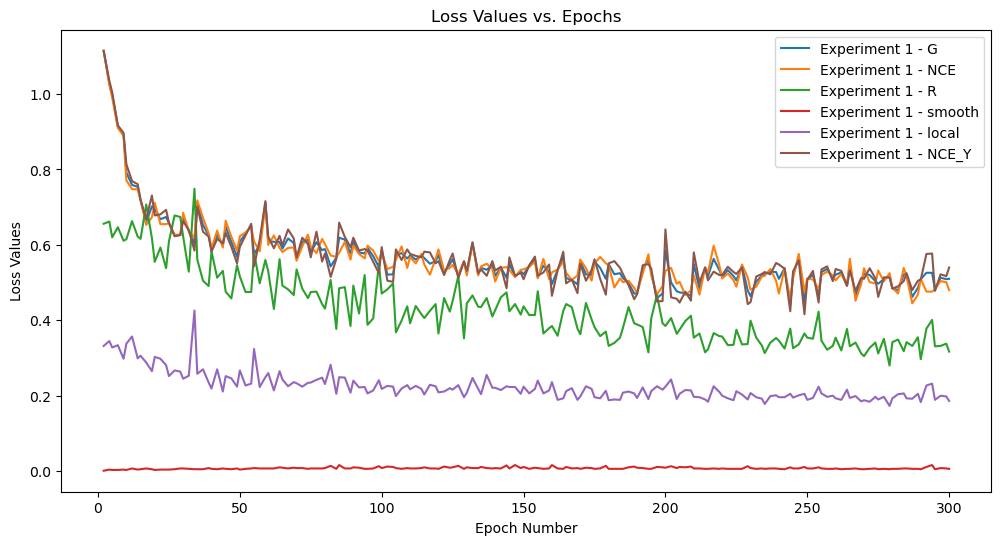

In [4]:
import re
import matplotlib.pyplot as plt

def parse_loss_log(log_file):
    epoch_numbers = []
    loss_values = {key: [] for key in ['G', 'NCE', 'R', 'smooth', 'local', 'NCE_Y']}

    with open(log_file, 'r') as file:
        for line in file:
            # Check if the line contains loss values
            if re.search(r'G: (\d+\.\d+) NCE: (\d+\.\d+) R: (\d+\.\d+) smooth: (\d+\.\d+) local: (\d+\.\d+) NCE_Y: (\d+\.\d+)', line):
                epoch_match = re.search(r'epoch: (\d+)', line)
                if epoch_match:
                    epoch_number = int(epoch_match.group(1))
                    epoch_numbers.append(epoch_number)

                    # Extract loss values
                    loss_match = re.search(r'G: (\d+\.\d+) NCE: (\d+\.\d+) R: (\d+\.\d+) smooth: (\d+\.\d+) local: (\d+\.\d+) NCE_Y: (\d+\.\d+)', line)
                    if loss_match:
                        for key, value in zip(['G', 'NCE', 'R', 'smooth', 'local', 'NCE_Y'], map(float, loss_match.groups())):
                            loss_values[key].append(value)

    return epoch_numbers, loss_values

def plot_loss_graph(loss_logs, labels):
    plt.figure(figsize=(12, 6))

    for i, loss_log in enumerate(loss_logs):
        epoch_numbers, loss_values = parse_loss_log(loss_log)

        for key in loss_values:
            plt.plot(epoch_numbers, loss_values[key], label=f'{labels[i]} - {key}')

    plt.xlabel('Epoch Number')
    plt.ylabel('Loss Values')
    plt.title('Loss Values vs. Epochs')
    plt.legend()
    plt.show()

# Provide the paths to the loss log files
loss_logs = [
    '/home/souraja/DFMIR/checkpoints/experiment_name/loss_log.txt'
]

# Provide the labels for the loss logs
labels = [
    'Experiment 1'
]

plot_loss_graph(loss_logs, labels)


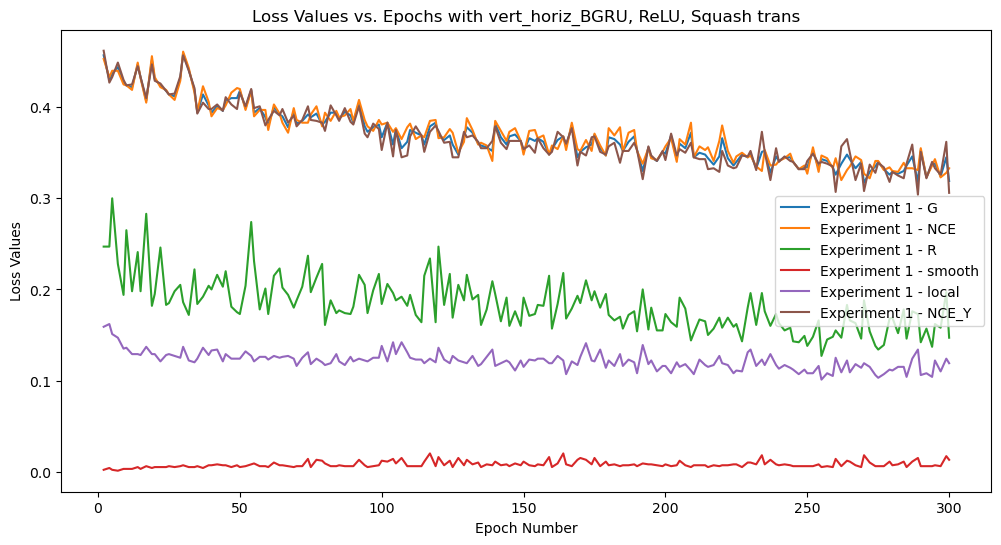

In [15]:
import re
import matplotlib.pyplot as plt

def parse_loss_log(log_file):
    epoch_numbers = []
    loss_values = {key: [] for key in ['G', 'NCE', 'R', 'smooth', 'local', 'NCE_Y']}

    with open(log_file, 'r') as file:
        for line in file:
            # Check if the line contains loss values
            if re.search(r'G: (\d+\.\d+) NCE: (\d+\.\d+) R: (\d+\.\d+) smooth: (\d+\.\d+) local: (\d+\.\d+) NCE_Y: (\d+\.\d+)', line):
                epoch_match = re.search(r'epoch: (\d+)', line)
                if epoch_match:
                    epoch_number = int(epoch_match.group(1))
                    epoch_numbers.append(epoch_number)

                    # Extract loss values
                    loss_match = re.search(r'G: (\d+\.\d+) NCE: (\d+\.\d+) R: (\d+\.\d+) smooth: (\d+\.\d+) local: (\d+\.\d+) NCE_Y: (\d+\.\d+)', line)
                    if loss_match:
                        for key, value in zip(['G', 'NCE', 'R', 'smooth', 'local', 'NCE_Y'], map(float, loss_match.groups())):
                            loss_values[key].append(value)

    return epoch_numbers, loss_values

def plot_loss_graph(loss_logs, labels):
    plt.figure(figsize=(12, 6))

    for i, loss_log in enumerate(loss_logs):
        epoch_numbers, loss_values = parse_loss_log(loss_log)

        for key in loss_values:
            plt.plot(epoch_numbers, loss_values[key], label=f'{labels[i]} - {key}')

    plt.xlabel('Epoch Number')
    plt.ylabel('Loss Values')
    plt.title('Loss Values vs. Epochs with vert_horiz_BGRU, ReLU, Squash trans')
    plt.legend()
    plt.show()

# Provide the paths to the loss log files
loss_logs = [
    '/home/souraja/DFMIR/checkpoints/experiment_name/loss_log.txt'
]

# Provide the labels for the loss logs
labels = [
    'Experiment 1'
]

plot_loss_graph(loss_logs, labels)


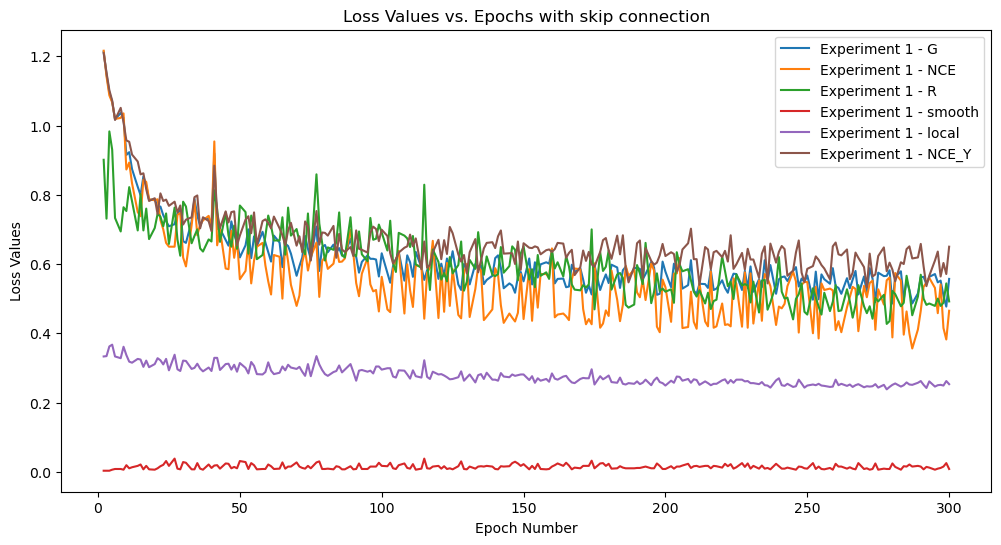

In [7]:
import re
import matplotlib.pyplot as plt

def parse_loss_log(log_file):
    epoch_numbers = []
    loss_values = {key: [] for key in ['G', 'NCE', 'R', 'smooth', 'local', 'NCE_Y']}

    with open(log_file, 'r') as file:
        for line in file:
            # Check if the line contains loss values
            if re.search(r'G: (\d+\.\d+) NCE: (\d+\.\d+) R: (\d+\.\d+) smooth: (\d+\.\d+) local: (\d+\.\d+) NCE_Y: (\d+\.\d+)', line):
                epoch_match = re.search(r'epoch: (\d+)', line)
                if epoch_match:
                    epoch_number = int(epoch_match.group(1))
                    epoch_numbers.append(epoch_number)

                    # Extract loss values
                    loss_match = re.search(r'G: (\d+\.\d+) NCE: (\d+\.\d+) R: (\d+\.\d+) smooth: (\d+\.\d+) local: (\d+\.\d+) NCE_Y: (\d+\.\d+)', line)
                    if loss_match:
                        for key, value in zip(['G', 'NCE', 'R', 'smooth', 'local', 'NCE_Y'], map(float, loss_match.groups())):
                            loss_values[key].append(value)

    return epoch_numbers, loss_values

def plot_loss_graph(loss_logs, labels):
    plt.figure(figsize=(12, 6))

    for i, loss_log in enumerate(loss_logs):
        epoch_numbers, loss_values = parse_loss_log(loss_log)

        for key in loss_values:
            plt.plot(epoch_numbers, loss_values[key], label=f'{labels[i]} - {key}')

    plt.xlabel('Epoch Number')
    plt.ylabel('Loss Values')
    plt.title('Loss Values vs. Epochs with skip connection')
    plt.legend()
    plt.show()

# Provide the paths to the loss log files
loss_logs = [
    '/home/souraja/DFMIR/checkpoints/experiment_name/loss_log.txt'
]

# Provide the labels for the loss logs
labels = [
    'Experiment 1'
]

plot_loss_graph(loss_logs, labels)


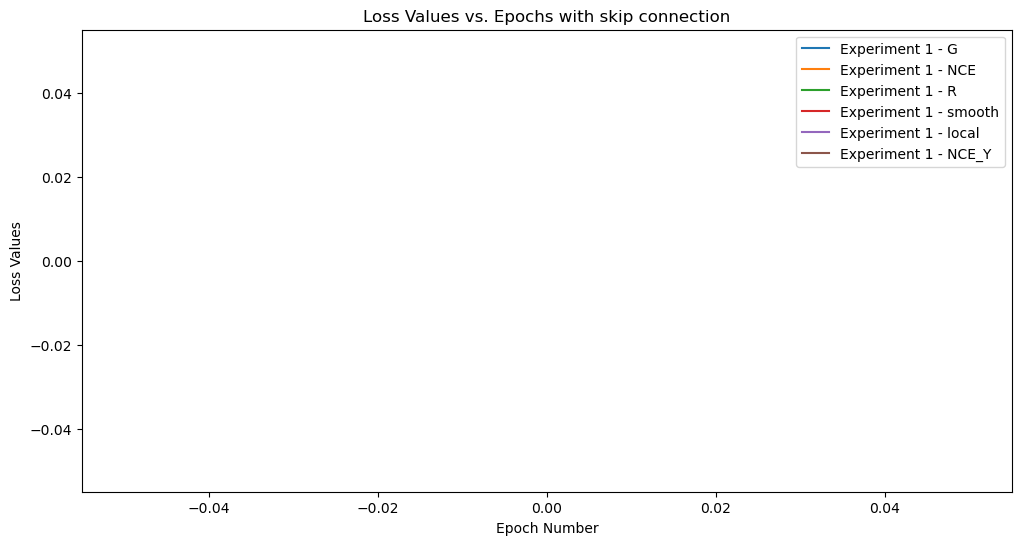

In [8]:
import re
import matplotlib.pyplot as plt

def parse_loss_log(log_file):
    epoch_numbers = []
    loss_values = {key: [] for key in ['G', 'NCE', 'R', 'smooth', 'local', 'NCE_Y']}

    with open(log_file, 'r') as file:
        for line in file:
            # Check if the line contains loss values
            if re.search(r'G: (\d+\.\d+) NCE: (\d+\.\d+) R: (\d+\.\d+) smooth: (\d+\.\d+) local: (\d+\.\d+) NCE_Y: (\d+\.\d+)', line):
                epoch_match = re.search(r'epoch: (\d+)', line)
                if epoch_match:
                    epoch_number = int(epoch_match.group(1))
                    epoch_numbers.append(epoch_number)

                    # Extract loss values
                    loss_match = re.search(r'G: (\d+\.\d+) NCE: (\d+\.\d+) R: (\d+\.\d+) smooth: (\d+\.\d+) local: (\d+\.\d+) NCE_Y: (\d+\.\d+)', line)
                    if loss_match:
                        for key, value in zip(['G', 'NCE', 'R', 'smooth', 'local', 'NCE_Y'], map(float, loss_match.groups())):
                            loss_values[key].append(value)

    return epoch_numbers, loss_values

def plot_loss_graph(loss_logs, labels):
    plt.figure(figsize=(12, 6))

    for i, loss_log in enumerate(loss_logs):
        epoch_numbers, loss_values = parse_loss_log(loss_log)

        for key in loss_values:
            plt.plot(epoch_numbers, loss_values[key], label=f'{labels[i]} - {key}')

    plt.xlabel('Epoch Number')
    plt.ylabel('Loss Values')
    plt.title('Loss Values vs. Epochs with skip connection')
    plt.legend()
    plt.show()

# Provide the paths to the loss log files
loss_logs = [
    '/home/souraja/DFMIR/checkpoints/experiment_name/loss_log.txt'
]

# Provide the labels for the loss logs
labels = [
    'Experiment 1'
]

plot_loss_graph(loss_logs, labels)


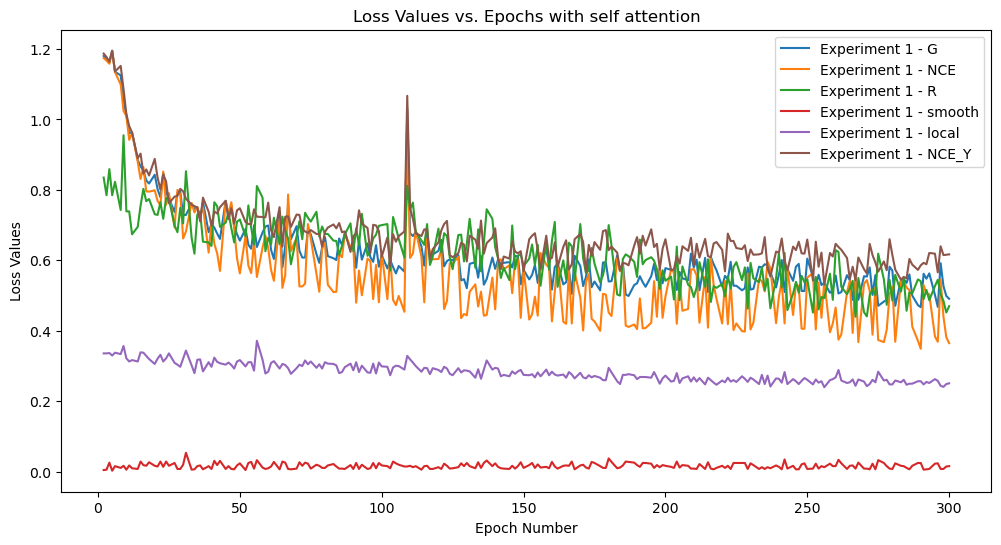

In [16]:
import re
import matplotlib.pyplot as plt

def parse_loss_log(log_file):
    epoch_numbers = []
    loss_values = {key: [] for key in ['G', 'NCE', 'R', 'smooth', 'local', 'NCE_Y']}

    with open(log_file, 'r') as file:
        for line in file:
            # Check if the line contains loss values
            if re.search(r'G: (\d+\.\d+) NCE: (\d+\.\d+) R: (\d+\.\d+) smooth: (\d+\.\d+) local: (\d+\.\d+) NCE_Y: (\d+\.\d+)', line):
                epoch_match = re.search(r'epoch: (\d+)', line)
                if epoch_match:
                    epoch_number = int(epoch_match.group(1))
                    epoch_numbers.append(epoch_number)

                    # Extract loss values
                    loss_match = re.search(r'G: (\d+\.\d+) NCE: (\d+\.\d+) R: (\d+\.\d+) smooth: (\d+\.\d+) local: (\d+\.\d+) NCE_Y: (\d+\.\d+)', line)
                    if loss_match:
                        for key, value in zip(['G', 'NCE', 'R', 'smooth', 'local', 'NCE_Y'], map(float, loss_match.groups())):
                            loss_values[key].append(value)

    return epoch_numbers, loss_values

def plot_loss_graph(loss_logs, labels):
    plt.figure(figsize=(12, 6))

    for i, loss_log in enumerate(loss_logs):
        epoch_numbers, loss_values = parse_loss_log(loss_log)

        for key in loss_values:
            plt.plot(epoch_numbers, loss_values[key], label=f'{labels[i]} - {key}')

    plt.xlabel('Epoch Number')
    plt.ylabel('Loss Values')
    plt.title('Loss Values vs. Epochs with self attention')
    plt.legend()
    plt.show()

# Provide the paths to the loss log files
loss_logs = [
    '/home/souraja/DFMIR/checkpoints/experiment_name/loss_log_selfattention.txt'
]

# Provide the labels for the loss logs
labels = [
    'Experiment 1'
]

plot_loss_graph(loss_logs, labels)


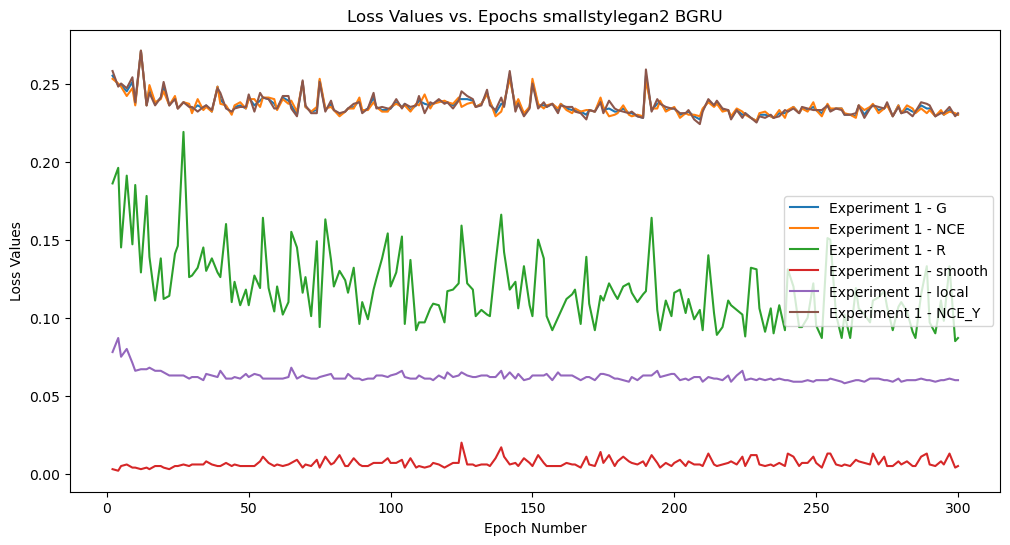

In [48]:
import re
import matplotlib.pyplot as plt

def parse_loss_log(log_file):
    epoch_numbers = []
    loss_values = {key: [] for key in ['G', 'NCE', 'R', 'smooth', 'local', 'NCE_Y']}

    with open(log_file, 'r') as file:
        for line in file:
            # Check if the line contains loss values
            if re.search(r'G: (\d+\.\d+) NCE: (\d+\.\d+) R: (\d+\.\d+) smooth: (\d+\.\d+) local: (\d+\.\d+) NCE_Y: (\d+\.\d+)', line):
                epoch_match = re.search(r'epoch: (\d+)', line)
                if epoch_match:
                    epoch_number = int(epoch_match.group(1))
                    epoch_numbers.append(epoch_number)

                    # Extract loss values
                    loss_match = re.search(r'G: (\d+\.\d+) NCE: (\d+\.\d+) R: (\d+\.\d+) smooth: (\d+\.\d+) local: (\d+\.\d+) NCE_Y: (\d+\.\d+)', line)
                    if loss_match:
                        for key, value in zip(['G', 'NCE', 'R', 'smooth', 'local', 'NCE_Y'], map(float, loss_match.groups())):
                            loss_values[key].append(value)

    return epoch_numbers, loss_values

def plot_loss_graph(loss_logs, labels):
    plt.figure(figsize=(12, 6))

    for i, loss_log in enumerate(loss_logs):
        epoch_numbers, loss_values = parse_loss_log(loss_log)

        for key in loss_values:
            plt.plot(epoch_numbers, loss_values[key], label=f'{labels[i]} - {key}')

    plt.xlabel('Epoch Number')
    plt.ylabel('Loss Values')
    plt.title('Loss Values vs. Epochs smallstylegan2 BGRU')
    plt.legend()
    plt.show()

# Provide the paths to the loss log files
loss_logs = [
    '/home/souraja/DFMIR/checkpoints/experiment_name/loss_log.txt'
]

# Provide the labels for the loss logs
labels = [
    'Experiment 1'
]

plot_loss_graph(loss_logs, labels)


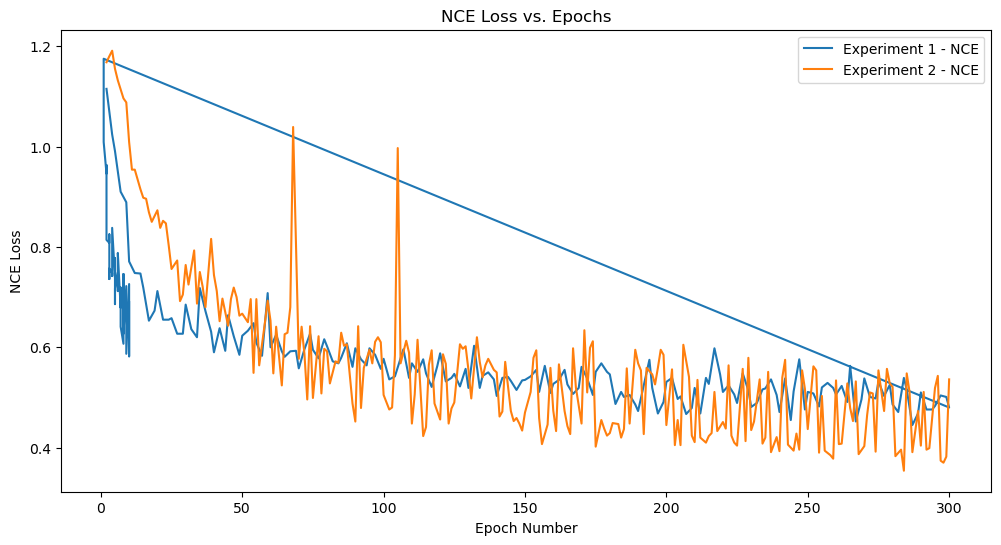

Average NCE Loss over the Last 50 Epochs: 0.46004


In [13]:
import re
import matplotlib.pyplot as plt

def parse_loss_log(log_file):
    epoch_numbers = []
    loss_values = {'NCE': []}
    epoch_losses = {'NCE': []}

    with open(log_file, 'r') as file:
        for line in file:
            # Check if the line contains NCE loss values
            if re.search(r'NCE: (\d+\.\d+)', line):
                epoch_match = re.search(r'epoch: (\d+)', line)
                if epoch_match:
                    epoch_number = int(epoch_match.group(1))
                    epoch_numbers.append(epoch_number)

                    # Extract NCE loss values
                    loss_match = re.search(r'NCE: (\d+\.\d+)', line)
                    if loss_match:
                        nce_loss = float(loss_match.group(1))
                        loss_values['NCE'].append(nce_loss)
                        epoch_losses['NCE'].append(nce_loss)

    return epoch_numbers, loss_values, epoch_losses

def plot_nce_loss(log_files, labels):
    plt.figure(figsize=(12, 6))

    for i, log_file in enumerate(log_files):
        epoch_numbers, loss_values, epoch_losses = parse_loss_log(log_file)
        plt.plot(epoch_numbers, loss_values['NCE'], label=f'{labels[i]} - NCE')

    plt.xlabel('Epoch Number')
    plt.ylabel('NCE Loss')
    plt.title('NCE Loss vs. Epochs')
    plt.legend()
    plt.show()

    # Calculate the average NCE loss over the last 50 epochs
    last_50_epochs = slice(-50, None)
    avg_nce_losses = sum(epoch_losses['NCE'][last_50_epochs]) / 50
    print(f'Average NCE Loss over the Last 50 Epochs: {avg_nce_losses}')

# Provide the paths to the NCE loss log files
log_files = [
    '/home/souraja/DFMIR/checkpoints/experiment_name/loss_log_orig.txt',
    '/home/souraja/DFMIR/checkpoints/experiment_name/loss_log.txt'
]

# Provide the labels for the NCE loss logs
labels = [
    'Experiment 1',
    'Experiment 2'
]

plot_nce_loss(log_files, labels)


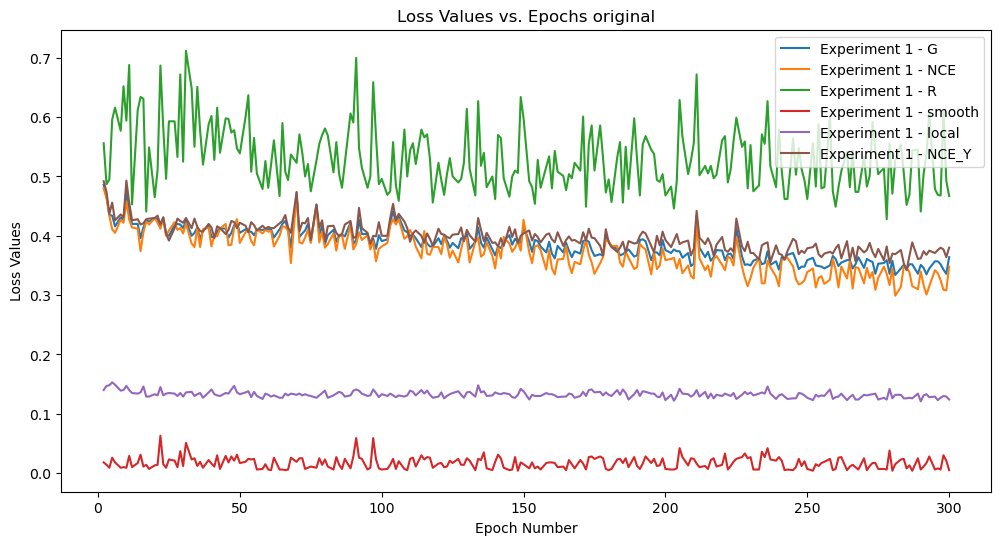

In [18]:
import re
import matplotlib.pyplot as plt

def parse_loss_log(log_file):
    epoch_numbers = []
    loss_values = {key: [] for key in ['G', 'NCE', 'R', 'smooth', 'local', 'NCE_Y']}

    with open(log_file, 'r') as file:
        for line in file:
            # Check if the line contains loss values
            if re.search(r'G: (\d+\.\d+) NCE: (\d+\.\d+) R: (\d+\.\d+) smooth: (\d+\.\d+) local: (\d+\.\d+) NCE_Y: (\d+\.\d+)', line):
                epoch_match = re.search(r'epoch: (\d+)', line)
                if epoch_match:
                    epoch_number = int(epoch_match.group(1))
                    epoch_numbers.append(epoch_number)

                    # Extract loss values
                    loss_match = re.search(r'G: (\d+\.\d+) NCE: (\d+\.\d+) R: (\d+\.\d+) smooth: (\d+\.\d+) local: (\d+\.\d+) NCE_Y: (\d+\.\d+)', line)
                    if loss_match:
                        for key, value in zip(['G', 'NCE', 'R', 'smooth', 'local', 'NCE_Y'], map(float, loss_match.groups())):
                            loss_values[key].append(value)

    return epoch_numbers, loss_values

def plot_loss_graph(loss_logs, labels):
    plt.figure(figsize=(12, 6))

    for i, loss_log in enumerate(loss_logs):
        epoch_numbers, loss_values = parse_loss_log(loss_log)

        for key in loss_values:
            plt.plot(epoch_numbers, loss_values[key], label=f'{labels[i]} - {key}')

    plt.xlabel('Epoch Number')
    plt.ylabel('Loss Values')
    plt.title('Loss Values vs. Epochs original')
    plt.legend()
    plt.show()

# Provide the paths to the loss log files
loss_logs = [
    '/home/souraja/DFMIR/checkpoints/experiment_name/loss_log.txt'
]

# Provide the labels for the loss logs
labels = [
    'Experiment 1'
]

plot_loss_graph(loss_logs, labels)


Average R Loss over the Last 50 Epochs for Original: 0.7293399999999999
Average R Loss over the Last 50 Epochs for Stylegan with selfatention: 0.5173400000000001
Average R Loss over the Last 50 Epochs for Selfattention: 0.51702
Average R Loss over the Last 50 Epochs for Stylegan: 0.5085000000000001
Average R Loss over the Last 50 Epochs for StyleGAN with GELU: 0.2852
Average R Loss over the Last 50 Epochs for StyleGAN, Unet trans, GELU: 0.29482
Average R Loss over the Last 50 Epochs for Unet L2: 0.19518000000000008
Average R Loss over the Last 50 Epochs for Unet transformer L2: 0.18748000000000004
Average R Loss over the Last 50 Epochs for Unet trans with BGRU: 0.15693999999999997
Average R Loss over the Last 50 Epochs for vert_horiz_BGRU unet trans: 0.16510000000000002
Average R Loss over the Last 50 Epochs for BGRU_ReLU_squash: 0.15918000000000002


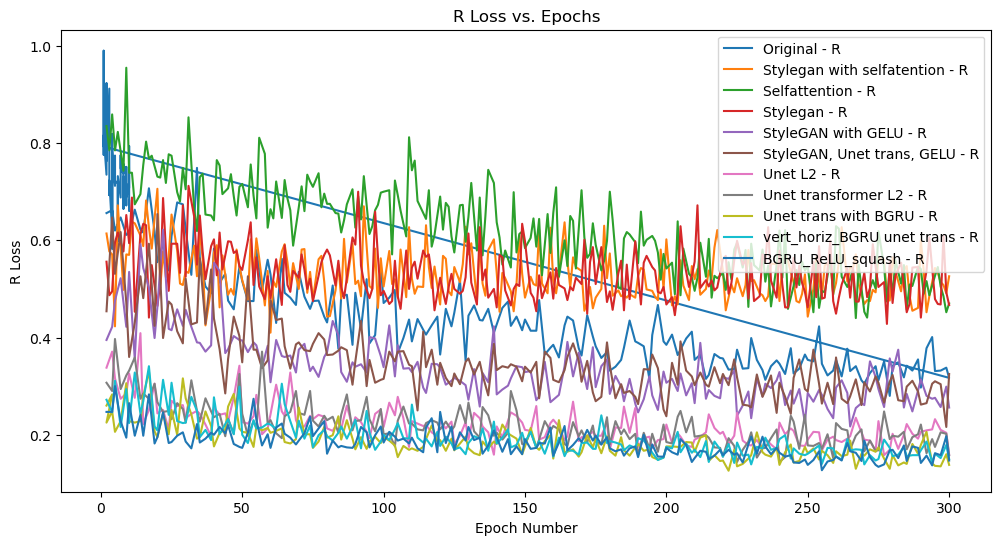

In [16]:
import re
import matplotlib.pyplot as plt

def parse_loss_log(log_file):
    epoch_numbers = []
    loss_values = {'R': []}
    epoch_losses = {'R': []}

    with open(log_file, 'r') as file:
        for line in file:
            # Check if the line contains NCE loss values
            if re.search(r'R: (\d+\.\d+)', line):
                epoch_match = re.search(r'epoch: (\d+)', line)
                if epoch_match:
                    epoch_number = int(epoch_match.group(1))
                    epoch_numbers.append(epoch_number)

                    # Extract NCE loss values
                    loss_match = re.search(r'R: (\d+\.\d+)', line)
                    if loss_match:
                        nce_loss = float(loss_match.group(1))
                        loss_values['R'].append(nce_loss)
                        epoch_losses['R'].append(nce_loss)

    return epoch_numbers, loss_values, epoch_losses

def plot_nce_loss(log_files, labels):
    plt.figure(figsize=(12, 6))

    for i, log_file in enumerate(log_files):
        epoch_numbers, loss_values, epoch_losses = parse_loss_log(log_file)
        plt.plot(epoch_numbers, loss_values['R'], label=f'{labels[i]} - R')

        # Calculate the average NCE loss over the last 50 epochs
        last_50_epochs = slice(-50, None)
        avg_nce_losses = sum(epoch_losses['R'][last_50_epochs]) / 50
        print(f'Average R Loss over the Last 50 Epochs for {labels[i]}: {avg_nce_losses}')

    plt.xlabel('Epoch Number')
    plt.ylabel('R Loss')
    plt.title('R Loss vs. Epochs')
    plt.legend()
    plt.show()

# Provide the paths to the NCE loss log files
log_files = [
    '/home/souraja/DFMIR/checkpoints/loss_log_orig.txt',
    '/home/souraja/DFMIR/checkpoints/loss_log_stylegan_selfattention.txt',
    '/home/souraja/DFMIR/checkpoints/loss_log_selfattention.txt',
    '/home/souraja/DFMIR/checkpoints/loss_log_stylegan2.txt',
    '/home/souraja/DFMIR/checkpoints/loss_log_stylrgan_GELU.txt',
    '/home/souraja/DFMIR/checkpoints/loss_log_unet_weight_dropout.txt',
    '/home/souraja/DFMIR/checkpoints/loss_log_L2_unet.txt',
    '/home/souraja/DFMIR/results/UnettransL2one/loss_log_trans.txt',
    '/home/souraja/DFMIR/results/unettransL2BGRU/loss_log_transBGRU.txt',
    '/home/souraja/DFMIR/results/BGRU_ReLU/loss_log.txt',
    '/home/souraja/DFMIR/results/Unet _trans_both_L2/loss_log.txt',
    '/home/souraja/DFMIR/checkpoints/experiment_name/loss_log.txt'
]

# Provide the labels for the NCE loss logs

labels = [
    'Original',
    'Stylegan with selfatention',
    'Selfattention',
    'Stylegan',
    'StyleGAN with GELU',
    'StyleGAN, Unet trans, GELU',
    'Unet L2',
    'Unet transformer L2',
    'Unet trans with BGRU',
    'vert_horiz_BGRU unet trans',
    'BGRU_ReLU_squash'
]

plot_nce_loss(log_files, labels)


Average R Loss over the Last 50 Epochs for Proposed: 0.16772
Average R Loss over the Last 50 Epochs for w/o BGRU: 0.15863999999999995
Average R Loss over the Last 50 Epochs for w/o Transformer: 0.16864
Average R Loss over the Last 50 Epochs for w/o Stylegan: 0.2911600000000001


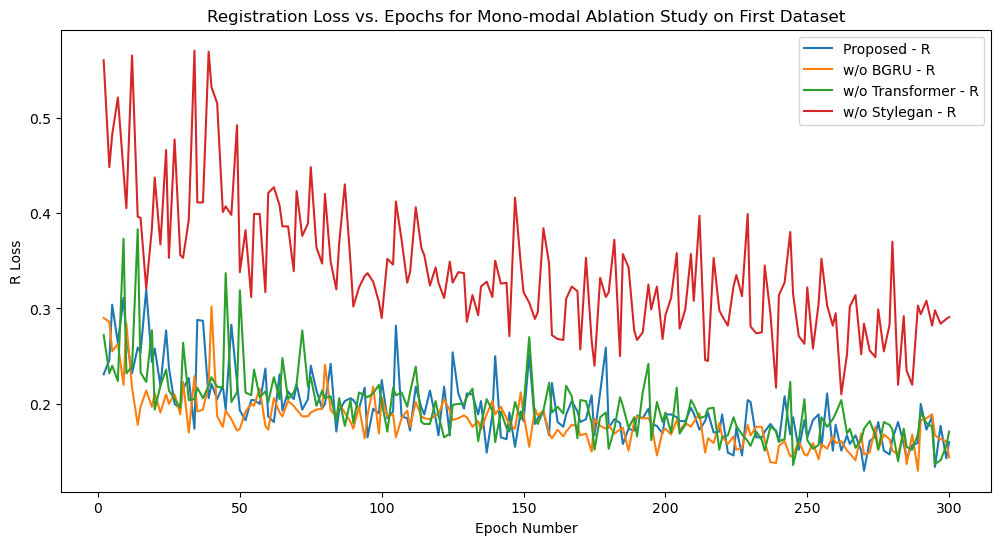

In [33]:
import re
import matplotlib.pyplot as plt

def parse_loss_log(log_file):
    epoch_numbers = []
    loss_values = {'R': []}
    epoch_losses = {'R': []}

    with open(log_file, 'r') as file:
        for line in file:
            # Check if the line contains NCE loss values
            if re.search(r'R: (\d+\.\d+)', line):
                epoch_match = re.search(r'epoch: (\d+)', line)
                if epoch_match:
                    epoch_number = int(epoch_match.group(1))
                    epoch_numbers.append(epoch_number)

                    # Extract NCE loss values
                    loss_match = re.search(r'R: (\d+\.\d+)', line)
                    if loss_match:
                        nce_loss = float(loss_match.group(1))
                        loss_values['R'].append(nce_loss)
                        epoch_losses['R'].append(nce_loss)

    return epoch_numbers, loss_values, epoch_losses

def plot_nce_loss(log_files, labels):
    plt.figure(figsize=(12, 6))

    for i, log_file in enumerate(log_files):
        epoch_numbers, loss_values, epoch_losses = parse_loss_log(log_file)
        plt.plot(epoch_numbers, loss_values['R'], label=f'{labels[i]} - R')

        # Calculate the average NCE loss over the last 50 epochs
        last_50_epochs = slice(-50, None)
        avg_nce_losses = sum(epoch_losses['R'][last_50_epochs]) / 50
        print(f'Average R Loss over the Last 50 Epochs for {labels[i]}: {avg_nce_losses}')

    plt.xlabel('Epoch Number')
    plt.ylabel('R Loss')
    plt.title('Registration Loss vs. Epochs for Mono-modal Ablation Study on First Dataset')
    plt.legend()
    plt.show()

# Provide the paths to the NCE loss log files
log_files = [
    '/home/souraja/DFMIR/results/superresolutiononly1/loss_log.txt',
    '/home/souraja/DFMIR/results/Unet _trans_both_L2/loss_log.txt',
    '/home/souraja/DFMIR/results/withouttransformer1/loss_log.txt',
    '/home/souraja/DFMIR/checkpoints/loss_log_unettrans.txt'
]

# Provide the labels for the NCE loss logs

labels = [
    'Proposed',
    'w/o BGRU',
    'w/o Transformer',
    'w/o Stylegan'
]

plot_nce_loss(log_files, labels)


Average NCE Loss over the Last 50 Epochs for Proposed: 0.33494
Average NCE Loss over the Last 50 Epochs for w/o BGRU: 0.3468400000000001
Average NCE Loss over the Last 50 Epochs for w/o Transformer: 0.3448
Average NCE Loss over the Last 50 Epochs for w/o Stylegan: 0.34801999999999994


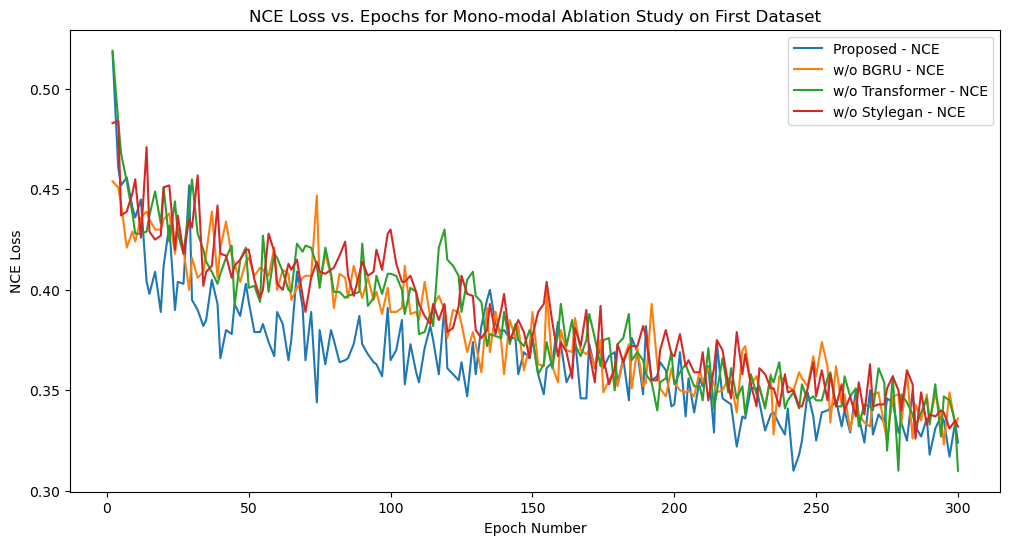

In [2]:
import re
import matplotlib.pyplot as plt

def parse_loss_log(log_file):
    epoch_numbers = []
    loss_values = {'NCE': []}
    epoch_losses = {'NCE': []}

    with open(log_file, 'r') as file:
        for line in file:
            # Check if the line contains NCE loss values
            if re.search(r'NCE: (\d+\.\d+)', line):
                epoch_match = re.search(r'epoch: (\d+)', line)
                if epoch_match:
                    epoch_number = int(epoch_match.group(1))
                    epoch_numbers.append(epoch_number)

                    # Extract NCE loss values
                    loss_match = re.search(r'NCE: (\d+\.\d+)', line)
                    if loss_match:
                        nce_loss = float(loss_match.group(1))
                        loss_values['NCE'].append(nce_loss)
                        epoch_losses['NCE'].append(nce_loss)

    return epoch_numbers, loss_values, epoch_losses

def plot_nce_loss(log_files, labels):
    plt.figure(figsize=(12, 6))

    for i, log_file in enumerate(log_files):
        epoch_numbers, loss_values, epoch_losses = parse_loss_log(log_file)
        plt.plot(epoch_numbers, loss_values['NCE'], label=f'{labels[i]} - NCE')

        # Calculate the average NCE loss over the last 50 epochs
        last_50_epochs = slice(-50, None)
        avg_nce_losses = sum(epoch_losses['NCE'][last_50_epochs]) / 50
        print(f'Average NCE Loss over the Last 50 Epochs for {labels[i]}: {avg_nce_losses}')

    plt.xlabel('Epoch Number')
    plt.ylabel('NCE Loss')
    plt.title('NCE Loss vs. Epochs for Mono-modal Ablation Study on First Dataset')
    plt.legend()
    plt.show()

# Provide the paths to the NCE loss log files
log_files = [
    '/home/souraja/DFMIR/results/superresolutiononly1/loss_log.txt',
    '/home/souraja/DFMIR/results/Unet _trans_both_L2/loss_log.txt',
    '/home/souraja/DFMIR/results/withouttransformer1/loss_log.txt',
    '/home/souraja/DFMIR/checkpoints/loss_log_unettrans.txt'
]

# Provide the labels for the NCE loss logs

labels = [
    'Proposed',
    'w/o BGRU',
    'w/o Transformer',
    'w/o Stylegan'
]

plot_nce_loss(log_files, labels)


In [ ]:
import re
import matplotlib.pyplot as plt

def parse_loss_log(log_file):
    epoch_numbers = []
    loss_values = {'R': []}
    epoch_losses = {'R': []}

    with open(log_file, 'r') as file:
        for line in file:
            # Check if the line contains NCE loss values
            if re.search(r'R: (\d+\.\d+)', line):
                epoch_match = re.search(r'epoch: (\d+)', line)
                if epoch_match:
                    epoch_number = int(epoch_match.group(1))
                    epoch_numbers.append(epoch_number)

                    # Extract NCE loss values
                    loss_match = re.search(r'R: (\d+\.\d+)', line)
                    if loss_match:
                        nce_loss = float(loss_match.group(1))
                        loss_values['R'].append(nce_loss)
                        epoch_losses['R'].append(nce_loss)

    return epoch_numbers, loss_values, epoch_losses

def plot_nce_loss(log_files, labels):
    plt.figure(figsize=(12, 6))

    for i, log_file in enumerate(log_files):
        epoch_numbers, loss_values, epoch_losses = parse_loss_log(log_file)
        plt.plot(epoch_numbers, loss_values['R'], label=f'{labels[i]} - R')

        # Calculate the average NCE loss over the last 50 epochs
        last_50_epochs = slice(-50, None)
        avg_nce_losses = sum(epoch_losses['R'][last_50_epochs]) / 50
        print(f'Average R Loss over the Last 50 Epochs for {labels[i]}: {avg_nce_losses}')

    plt.xlabel('Epoch Number')
    plt.ylabel('Registration Loss')
    plt.title('Registration Loss vs. Epochs for Mono-modal Ablation Study on First Dataset')
    plt.legend()
    plt.show()

# Provide the paths to the NCE loss log files
log_files = [
    '/home/souraja/DFMIR/results/superresolutiononly1/loss_log.txt',
    '/home/souraja/DFMIR/results/Unet _trans_both_L2/loss_log.txt',
    '/home/souraja/DFMIR/results/withouttransformer1/loss_log.txt',
    '/home/souraja/DFMIR/checkpoints/loss_log_unettrans.txt'
]

# Provide the labels for the NCE loss logs

labels = [
    'Proposed',
    'w/o BGRU',
    'w/o Transformer',
    'w/o Stylegan'
]

plot_nce_loss(log_files, labels)


Average R Loss over the Last 50 Epochs for Proposed: 0.15575999999999998
Average R Loss over the Last 50 Epochs for 1.5 x SR Loss: 0.17427999999999996
Average R Loss over the Last 50 Epochs for 1.5 x SSIM Loss: 0.42524
Average R Loss over the Last 50 Epochs for 2 x SSIM Loss: 0.6838399999999999
Average R Loss over the Last 50 Epochs for 1.5 x SSIM Loss with SR Loss: 0.5590999999999998


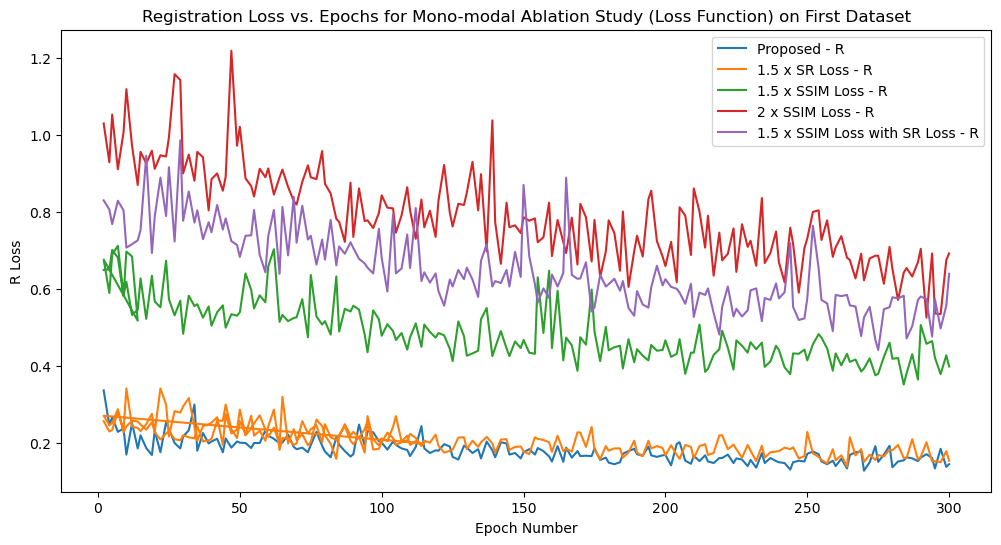

In [4]:
import re
import matplotlib.pyplot as plt

def parse_loss_log(log_file):
    epoch_numbers = []
    loss_values = {'R': []}
    epoch_losses = {'R': []}

    with open(log_file, 'r') as file:
        for line in file:
            # Check if the line contains NCE loss values
            if re.search(r'R: (\d+\.\d+)', line):
                epoch_match = re.search(r'epoch: (\d+)', line)
                if epoch_match:
                    epoch_number = int(epoch_match.group(1))
                    epoch_numbers.append(epoch_number)

                    # Extract NCE loss values
                    loss_match = re.search(r'R: (\d+\.\d+)', line)
                    if loss_match:
                        nce_loss = float(loss_match.group(1))
                        loss_values['R'].append(nce_loss)
                        epoch_losses['R'].append(nce_loss)

    return epoch_numbers, loss_values, epoch_losses

def plot_nce_loss(log_files, labels):
    plt.figure(figsize=(12, 6))

    for i, log_file in enumerate(log_files):
        epoch_numbers, loss_values, epoch_losses = parse_loss_log(log_file)
        plt.plot(epoch_numbers, loss_values['R'], label=f'{labels[i]} - R')

        # Calculate the average NCE loss over the last 50 epochs
        last_50_epochs = slice(-50, None)
        avg_nce_losses = sum(epoch_losses['R'][last_50_epochs]) / 50
        print(f'Average R Loss over the Last 50 Epochs for {labels[i]}: {avg_nce_losses}')

    plt.xlabel('Epoch Number')
    plt.ylabel('R Loss')
    plt.title('Registration Loss vs. Epochs for Mono-modal Ablation Study (Loss Function) on First Dataset')
    plt.legend()
    plt.show()

# Provide the paths to the NCE loss log files
log_files = [
    '/home/souraja/DFMIR/results/onlyBGRU_ReLU_Squash/loss_log.txt',
    '/home/souraja/DFMIR/results/superresolution1.5only/loss_log.txt',
    '/home/souraja/DFMIR/results/SSIM loss styleGAN/loss_log.txt',
    '/home/souraja/DFMIR/results/only SSIMwithweightfactor2/loss_log.txt',
    '/home/souraja/DFMIR/results/SSIM1.5=superresolution/loss_log.txt'
]

# Provide the labels for the NCE loss logs

labels = [
    'Proposed',
    '1.5 x SR Loss',
    '1.5 x SSIM Loss',
    '2 x SSIM Loss',
    '1.5 x SSIM Loss with SR Loss'
]

plot_nce_loss(log_files, labels)


Average NCE Loss over the Last 50 Epochs for Proposed: 0.34215999999999996
Average NCE Loss over the Last 50 Epochs for 1.5 x SR Loss: 0.34434
Average NCE Loss over the Last 50 Epochs for 1.5 x SSIM Loss: 0.3486200000000001
Average NCE Loss over the Last 50 Epochs for 2 x SSIM Loss: 0.34544
Average NCE Loss over the Last 50 Epochs for 1.5 x SSIM Loss with SR Loss: 0.35102000000000005


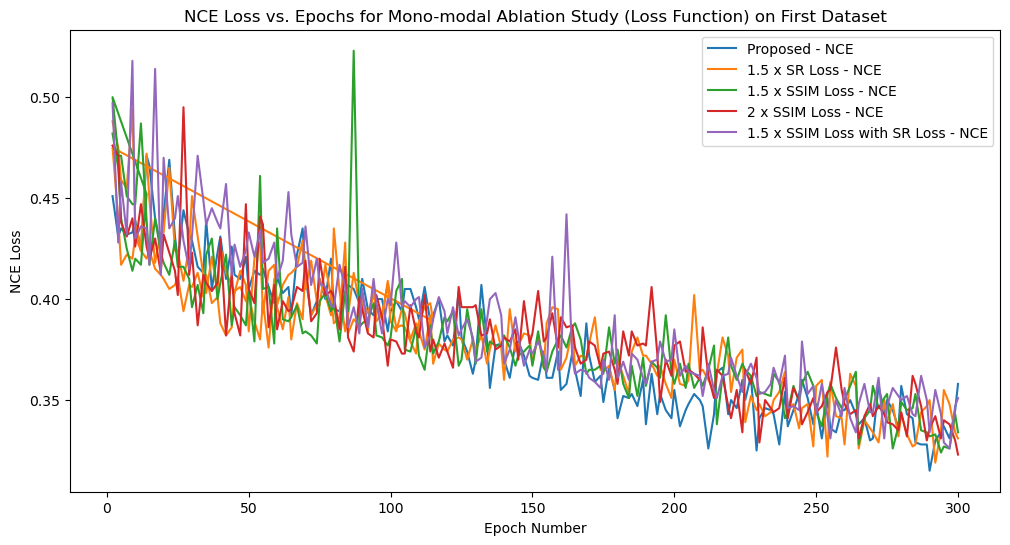

In [5]:
import re
import matplotlib.pyplot as plt

def parse_loss_log(log_file):
    epoch_numbers = []
    loss_values = {'NCE': []}
    epoch_losses = {'NCE': []}

    with open(log_file, 'r') as file:
        for line in file:
            # Check if the line contains NCE loss values
            if re.search(r'NCE: (\d+\.\d+)', line):
                epoch_match = re.search(r'epoch: (\d+)', line)
                if epoch_match:
                    epoch_number = int(epoch_match.group(1))
                    epoch_numbers.append(epoch_number)

                    # Extract NCE loss values
                    loss_match = re.search(r'NCE: (\d+\.\d+)', line)
                    if loss_match:
                        nce_loss = float(loss_match.group(1))
                        loss_values['NCE'].append(nce_loss)
                        epoch_losses['NCE'].append(nce_loss)

    return epoch_numbers, loss_values, epoch_losses

def plot_nce_loss(log_files, labels):
    plt.figure(figsize=(12, 6))

    for i, log_file in enumerate(log_files):
        epoch_numbers, loss_values, epoch_losses = parse_loss_log(log_file)
        plt.plot(epoch_numbers, loss_values['NCE'], label=f'{labels[i]} - NCE')

        # Calculate the average NCE loss over the last 50 epochs
        last_50_epochs = slice(-50, None)
        avg_nce_losses = sum(epoch_losses['NCE'][last_50_epochs]) / 50
        print(f'Average NCE Loss over the Last 50 Epochs for {labels[i]}: {avg_nce_losses}')

    plt.xlabel('Epoch Number')
    plt.ylabel('NCE Loss')
    plt.title('NCE Loss vs. Epochs for Mono-modal Ablation Study (Loss Function) on First Dataset')
    plt.legend()
    plt.show()

# Provide the paths to the NCE loss log files
log_files = [
    '/home/souraja/DFMIR/results/onlyBGRU_ReLU_Squash/loss_log.txt',
    '/home/souraja/DFMIR/results/superresolution1.5only/loss_log.txt',
    '/home/souraja/DFMIR/results/SSIM loss styleGAN/loss_log.txt',
    '/home/souraja/DFMIR/results/only SSIMwithweightfactor2/loss_log.txt',
    '/home/souraja/DFMIR/results/SSIM1.5=superresolution/loss_log.txt'
]

# Provide the labels for the NCE loss logs

labels = [
    'Proposed',
    '1.5 x SR Loss',
    '1.5 x SSIM Loss',
    '2 x SSIM Loss',
    '1.5 x SSIM Loss with SR Loss'
]

plot_nce_loss(log_files, labels)


Average R Loss over the Last 50 Epochs for Proposed: 0.18675999999999998
Average R Loss over the Last 50 Epochs for w/o BGRU: 0.18460000000000001
Average R Loss over the Last 50 Epochs for w/o SR Loss: 0.15548
Average R Loss over the Last 50 Epochs for w/o Transformer: 0.18498
Average R Loss over the Last 50 Epochs for w/o netF: 0.18116000000000007


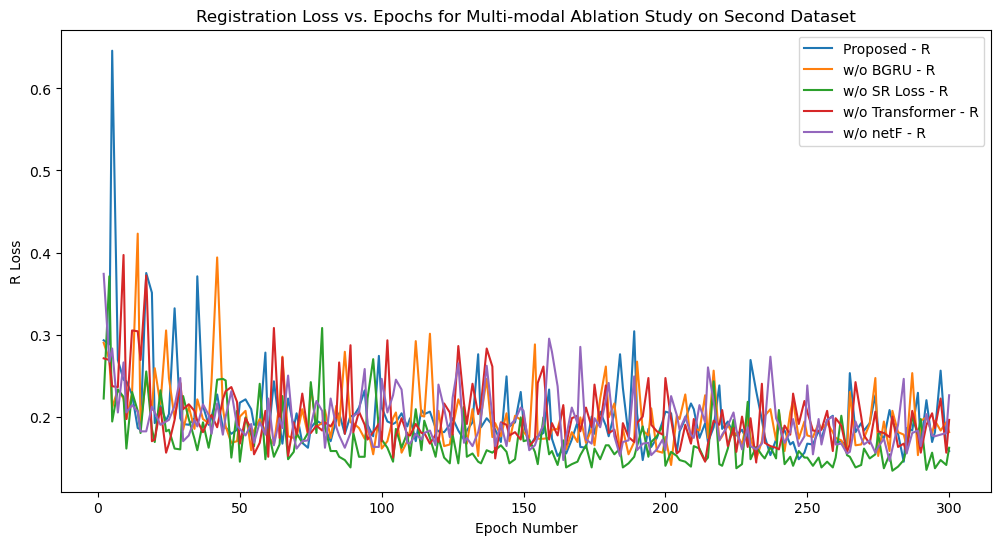

In [6]:
import re
import matplotlib.pyplot as plt

def parse_loss_log(log_file):
    epoch_numbers = []
    loss_values = {'R': []}
    epoch_losses = {'R': []}

    with open(log_file, 'r') as file:
        for line in file:
            # Check if the line contains NCE loss values
            if re.search(r'R: (\d+\.\d+)', line):
                epoch_match = re.search(r'epoch: (\d+)', line)
                if epoch_match:
                    epoch_number = int(epoch_match.group(1))
                    epoch_numbers.append(epoch_number)

                    # Extract NCE loss values
                    loss_match = re.search(r'R: (\d+\.\d+)', line)
                    if loss_match:
                        nce_loss = float(loss_match.group(1))
                        loss_values['R'].append(nce_loss)
                        epoch_losses['R'].append(nce_loss)

    return epoch_numbers, loss_values, epoch_losses

def plot_nce_loss(log_files, labels):
    plt.figure(figsize=(12, 6))

    for i, log_file in enumerate(log_files):
        epoch_numbers, loss_values, epoch_losses = parse_loss_log(log_file)
        plt.plot(epoch_numbers, loss_values['R'], label=f'{labels[i]} - R')

        # Calculate the average NCE loss over the last 50 epochs
        last_50_epochs = slice(-50, None)
        avg_nce_losses = sum(epoch_losses['R'][last_50_epochs]) / 50
        print(f'Average R Loss over the Last 50 Epochs for {labels[i]}: {avg_nce_losses}')

    plt.xlabel('Epoch Number')
    plt.ylabel('R Loss')
    plt.title('Registration Loss vs. Epochs for Multi-modal Ablation Study on Second Dataset')
    plt.legend()
    plt.show()

# Provide the paths to the NCE loss log files
log_files = [
    '/home/souraja/DFMIR/results/finalmodel2/loss_log.txt',
    '/home/souraja/DFMIR/results/withoutBGRUReLUSquash2/loss_log.txt',
    '/home/souraja/DFMIR/results/withoutsuperresolution2/loss_log.txt',
    '/home/souraja/DFMIR/results/withouttransformer2/loss_log.txt',
    '/home/souraja/DFMIR/results/withoutnewnetF2/loss_log.txt'
]

# Provide the labels for the NCE loss logs

labels = [
    'Proposed',
    'w/o BGRU',
    'w/o SR Loss',
    'w/o Transformer',
    'w/o netF'
]

plot_nce_loss(log_files, labels)


Average NCE Loss over the Last 50 Epochs for Proposed: 0.34687999999999986
Average NCE Loss over the Last 50 Epochs for w/o BGRU: 0.35980000000000006
Average NCE Loss over the Last 50 Epochs for w/o SR Loss: 0.3487800000000001
Average NCE Loss over the Last 50 Epochs for w/o Transformer: 0.34448000000000006
Average NCE Loss over the Last 50 Epochs for w/o netF: 0.34928


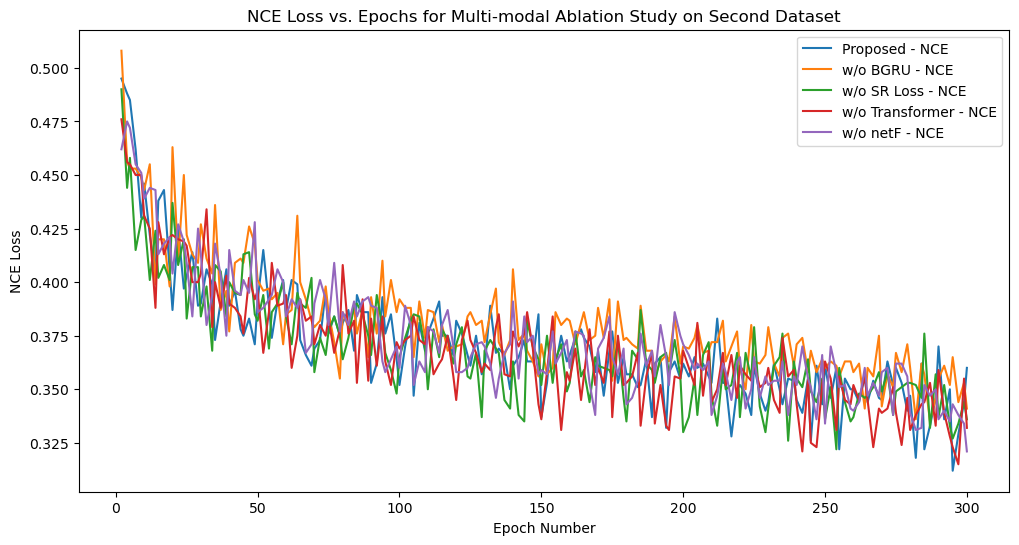

In [7]:
import re
import matplotlib.pyplot as plt

def parse_loss_log(log_file):
    epoch_numbers = []
    loss_values = {'NCE': []}
    epoch_losses = {'NCE': []}

    with open(log_file, 'r') as file:
        for line in file:
            # Check if the line contains NCE loss values
            if re.search(r'NCE: (\d+\.\d+)', line):
                epoch_match = re.search(r'epoch: (\d+)', line)
                if epoch_match:
                    epoch_number = int(epoch_match.group(1))
                    epoch_numbers.append(epoch_number)

                    # Extract NCE loss values
                    loss_match = re.search(r'NCE: (\d+\.\d+)', line)
                    if loss_match:
                        nce_loss = float(loss_match.group(1))
                        loss_values['NCE'].append(nce_loss)
                        epoch_losses['NCE'].append(nce_loss)

    return epoch_numbers, loss_values, epoch_losses

def plot_nce_loss(log_files, labels):
    plt.figure(figsize=(12, 6))

    for i, log_file in enumerate(log_files):
        epoch_numbers, loss_values, epoch_losses = parse_loss_log(log_file)
        plt.plot(epoch_numbers, loss_values['NCE'], label=f'{labels[i]} - NCE')

        # Calculate the average NCE loss over the last 50 epochs
        last_50_epochs = slice(-50, None)
        avg_nce_losses = sum(epoch_losses['NCE'][last_50_epochs]) / 50
        print(f'Average NCE Loss over the Last 50 Epochs for {labels[i]}: {avg_nce_losses}')

    plt.xlabel('Epoch Number')
    plt.ylabel('NCE Loss')
    plt.title('NCE Loss vs. Epochs for Multi-modal Ablation Study on Second Dataset')
    plt.legend()
    plt.show()

# Provide the paths to the NCE loss log files
log_files = [
    '/home/souraja/DFMIR/results/finalmodel2/loss_log.txt',
    '/home/souraja/DFMIR/results/withoutBGRUReLUSquash2/loss_log.txt',
    '/home/souraja/DFMIR/results/withoutsuperresolution2/loss_log.txt',
    '/home/souraja/DFMIR/results/withouttransformer2/loss_log.txt',
    '/home/souraja/DFMIR/results/withoutnewnetF2/loss_log.txt'
]

# Provide the labels for the NCE loss logs

labels = [
    'Proposed',
    'w/o BGRU',
    'w/o SR Loss',
    'w/o Transformer',
    'w/o netF'
]

plot_nce_loss(log_files, labels)


Average R Loss over the Last 50 Epochs for Proposed: 0.3055
Average R Loss over the Last 50 Epochs for w/o BGRU: 0.31948
Average R Loss over the Last 50 Epochs for w/o SR Loss: 0.26681999999999995
Average R Loss over the Last 50 Epochs for w/o Transformer: 0.30232
Average R Loss over the Last 50 Epochs for w/o netF: 0.30222


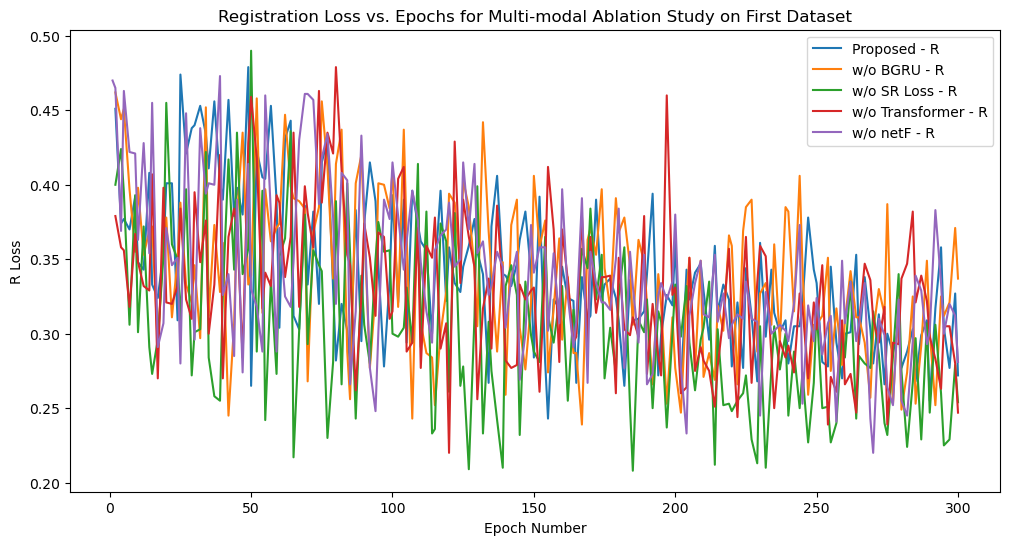

In [8]:
import re
import matplotlib.pyplot as plt

def parse_loss_log(log_file):
    epoch_numbers = []
    loss_values = {'R': []}
    epoch_losses = {'R': []}

    with open(log_file, 'r') as file:
        for line in file:
            # Check if the line contains NCE loss values
            if re.search(r'R: (\d+\.\d+)', line):
                epoch_match = re.search(r'epoch: (\d+)', line)
                if epoch_match:
                    epoch_number = int(epoch_match.group(1))
                    epoch_numbers.append(epoch_number)

                    # Extract NCE loss values
                    loss_match = re.search(r'R: (\d+\.\d+)', line)
                    if loss_match:
                        nce_loss = float(loss_match.group(1))
                        loss_values['R'].append(nce_loss)
                        epoch_losses['R'].append(nce_loss)

    return epoch_numbers, loss_values, epoch_losses

def plot_nce_loss(log_files, labels):
    plt.figure(figsize=(12, 6))

    for i, log_file in enumerate(log_files):
        epoch_numbers, loss_values, epoch_losses = parse_loss_log(log_file)
        plt.plot(epoch_numbers, loss_values['R'], label=f'{labels[i]} - R')

        # Calculate the average NCE loss over the last 50 epochs
        last_50_epochs = slice(-50, None)
        avg_nce_losses = sum(epoch_losses['R'][last_50_epochs]) / 50
        print(f'Average R Loss over the Last 50 Epochs for {labels[i]}: {avg_nce_losses}')

    plt.xlabel('Epoch Number')
    plt.ylabel('R Loss')
    plt.title('Registration Loss vs. Epochs for Multi-modal Ablation Study on First Dataset')
    plt.legend()
    plt.show()

# Provide the paths to the NCE loss log files
log_files = [
    '/home/souraja/DFMIR/results/finalmodelMRICT/loss_log.txt',
    '/home/souraja/DFMIR/results/withoutBGRUMRICT/loss_log.txt',
    '/home/souraja/DFMIR/results/withoutsuperresolutionMRICT/loss_log.txt',
    '/home/souraja/DFMIR/results/withouttransformerMRICT/loss_log.txt',
    '/home/souraja/DFMIR/results/withoutnewnetFMRICT/loss_log.txt'
]

# Provide the labels for the NCE loss logs

labels = [
    'Proposed',
    'w/o BGRU',
    'w/o SR Loss',
    'w/o Transformer',
    'w/o netF'
]

plot_nce_loss(log_files, labels)


Average NCE Loss over the Last 50 Epochs for Proposed: 0.3611999999999999
Average NCE Loss over the Last 50 Epochs for w/o BGRU: 0.35152
Average NCE Loss over the Last 50 Epochs for w/o SR Loss: 0.35842000000000007
Average NCE Loss over the Last 50 Epochs for w/o Transformer: 0.36412
Average NCE Loss over the Last 50 Epochs for w/o netF: 0.3538799999999999


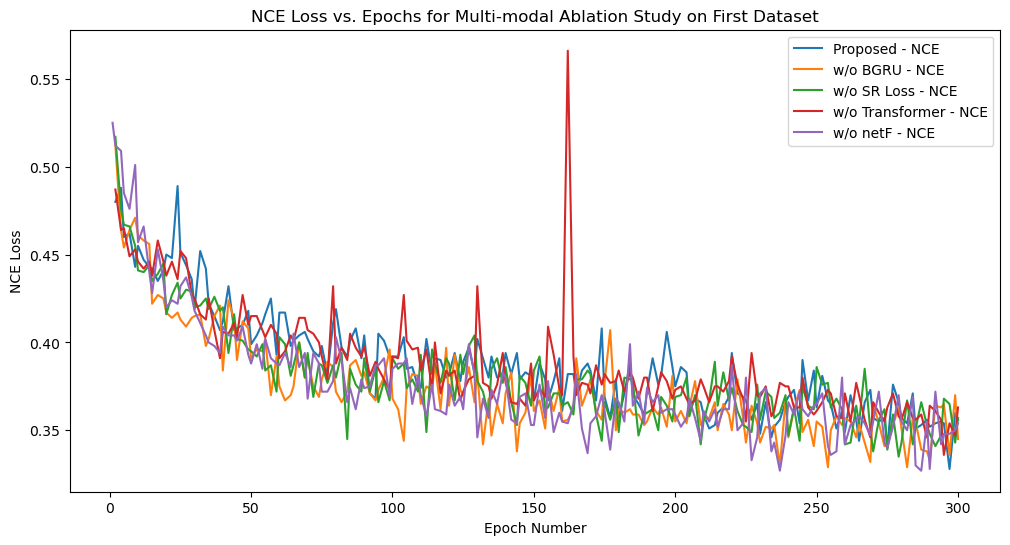

In [9]:
import re
import matplotlib.pyplot as plt

def parse_loss_log(log_file):
    epoch_numbers = []
    loss_values = {'NCE': []}
    epoch_losses = {'NCE': []}

    with open(log_file, 'r') as file:
        for line in file:
            # Check if the line contains NCE loss values
            if re.search(r'NCE: (\d+\.\d+)', line):
                epoch_match = re.search(r'epoch: (\d+)', line)
                if epoch_match:
                    epoch_number = int(epoch_match.group(1))
                    epoch_numbers.append(epoch_number)

                    # Extract NCE loss values
                    loss_match = re.search(r'NCE: (\d+\.\d+)', line)
                    if loss_match:
                        nce_loss = float(loss_match.group(1))
                        loss_values['NCE'].append(nce_loss)
                        epoch_losses['NCE'].append(nce_loss)

    return epoch_numbers, loss_values, epoch_losses

def plot_nce_loss(log_files, labels):
    plt.figure(figsize=(12, 6))

    for i, log_file in enumerate(log_files):
        epoch_numbers, loss_values, epoch_losses = parse_loss_log(log_file)
        plt.plot(epoch_numbers, loss_values['NCE'], label=f'{labels[i]} - NCE')

        # Calculate the average NCE loss over the last 50 epochs
        last_50_epochs = slice(-50, None)
        avg_nce_losses = sum(epoch_losses['NCE'][last_50_epochs]) / 50
        print(f'Average NCE Loss over the Last 50 Epochs for {labels[i]}: {avg_nce_losses}')

    plt.xlabel('Epoch Number')
    plt.ylabel('NCE Loss')
    plt.title('NCE Loss vs. Epochs for Multi-modal Ablation Study on First Dataset')
    plt.legend()
    plt.show()

# Provide the paths to the NCE loss log files
log_files = [
    '/home/souraja/DFMIR/results/finalmodelMRICT/loss_log.txt',
    '/home/souraja/DFMIR/results/withoutBGRUMRICT/loss_log.txt',
    '/home/souraja/DFMIR/results/withoutsuperresolutionMRICT/loss_log.txt',
    '/home/souraja/DFMIR/results/withouttransformerMRICT/loss_log.txt',
    '/home/souraja/DFMIR/results/withoutnewnetFMRICT/loss_log.txt'
]

# Provide the labels for the NCE loss logs

labels = [
    'Proposed',
    'w/o BGRU',
    'w/o SR Loss',
    'w/o Transformer',
    'w/o netF'
]

plot_nce_loss(log_files, labels)


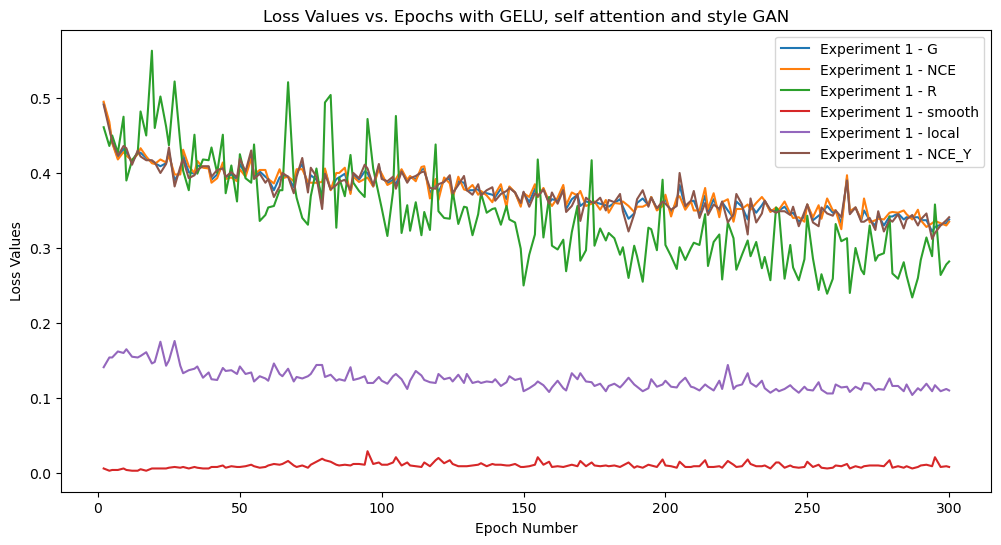

In [33]:
import re
import matplotlib.pyplot as plt

def parse_loss_log(log_file):
    epoch_numbers = []
    loss_values = {key: [] for key in ['G', 'NCE', 'R', 'smooth', 'local', 'NCE_Y']}

    with open(log_file, 'r') as file:
        for line in file:
            # Check if the line contains loss values
            if re.search(r'G: (\d+\.\d+) NCE: (\d+\.\d+) R: (\d+\.\d+) smooth: (\d+\.\d+) local: (\d+\.\d+) NCE_Y: (\d+\.\d+)', line):
                epoch_match = re.search(r'epoch: (\d+)', line)
                if epoch_match:
                    epoch_number = int(epoch_match.group(1))
                    epoch_numbers.append(epoch_number)

                    # Extract loss values
                    loss_match = re.search(r'G: (\d+\.\d+) NCE: (\d+\.\d+) R: (\d+\.\d+) smooth: (\d+\.\d+) local: (\d+\.\d+) NCE_Y: (\d+\.\d+)', line)
                    if loss_match:
                        for key, value in zip(['G', 'NCE', 'R', 'smooth', 'local', 'NCE_Y'], map(float, loss_match.groups())):
                            loss_values[key].append(value)

    return epoch_numbers, loss_values

def plot_loss_graph(loss_logs, labels):
    plt.figure(figsize=(12, 6))

    for i, loss_log in enumerate(loss_logs):
        epoch_numbers, loss_values = parse_loss_log(loss_log)

        for key in loss_values:
            plt.plot(epoch_numbers, loss_values[key], label=f'{labels[i]} - {key}')

    plt.xlabel('Epoch Number')
    plt.ylabel('Loss Values')
    plt.title('Loss Values vs. Epochs with GELU, self attention and style GAN')
    plt.legend()
    plt.show()

# Provide the paths to the loss log files
loss_logs = [
    '/home/souraja/DFMIR/checkpoints/experiment_name/loss_log.txt'
]

# Provide the labels for the loss logs
labels = [
    'Experiment 1'
]

plot_loss_graph(loss_logs, labels)


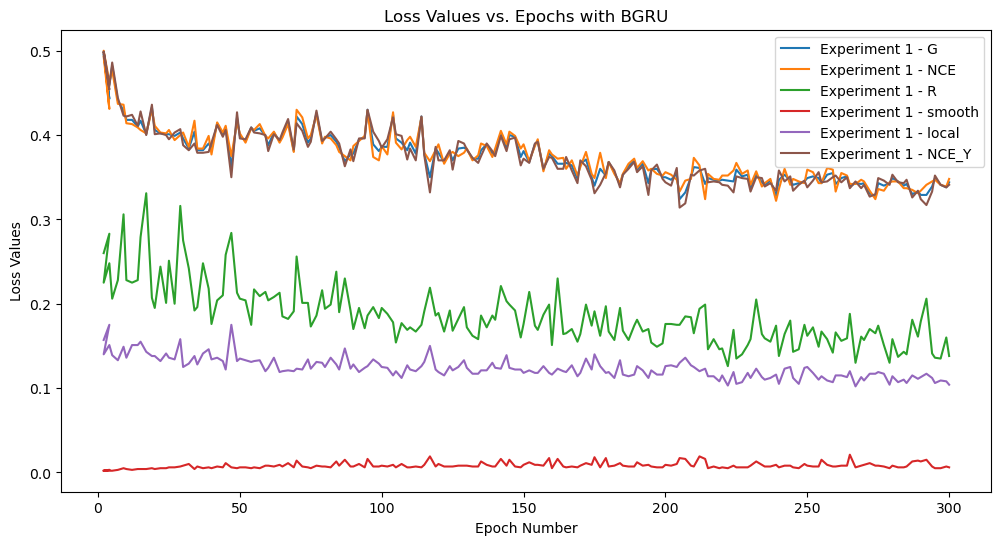

In [20]:
import re
import matplotlib.pyplot as plt

def parse_loss_log(log_file):
    epoch_numbers = []
    loss_values = {key: [] for key in ['G', 'NCE', 'R', 'smooth', 'local', 'NCE_Y']}

    with open(log_file, 'r') as file:
        for line in file:
            # Check if the line contains loss values
            if re.search(r'G: (\d+\.\d+) NCE: (\d+\.\d+) R: (\d+\.\d+) smooth: (\d+\.\d+) local: (\d+\.\d+) NCE_Y: (\d+\.\d+)', line):
                epoch_match = re.search(r'epoch: (\d+)', line)
                if epoch_match:
                    epoch_number = int(epoch_match.group(1))
                    epoch_numbers.append(epoch_number)

                    # Extract loss values
                    loss_match = re.search(r'G: (\d+\.\d+) NCE: (\d+\.\d+) R: (\d+\.\d+) smooth: (\d+\.\d+) local: (\d+\.\d+) NCE_Y: (\d+\.\d+)', line)
                    if loss_match:
                        for key, value in zip(['G', 'NCE', 'R', 'smooth', 'local', 'NCE_Y'], map(float, loss_match.groups())):
                            loss_values[key].append(value)

    return epoch_numbers, loss_values

def plot_loss_graph(loss_logs, labels):
    plt.figure(figsize=(12, 6))

    for i, loss_log in enumerate(loss_logs):
        epoch_numbers, loss_values = parse_loss_log(loss_log)

        for key in loss_values:
            plt.plot(epoch_numbers, loss_values[key], label=f'{labels[i]} - {key}')

    plt.xlabel('Epoch Number')
    plt.ylabel('Loss Values')
    plt.title('Loss Values vs. Epochs with BGRU')
    plt.legend()
    plt.show()

# Provide the paths to the loss log files
loss_logs = [
    '/home/souraja/DFMIR/checkpoints/experiment_name/loss_log.txt'
]

# Provide the labels for the loss logs
labels = [
    'Experiment 1'
]

plot_loss_graph(loss_logs, labels)


Average local Loss over the Last 50 Epochs for Original: 0.3091999999999999
Average local Loss over the Last 50 Epochs for Stylegan with selfatention: 0.13034
Average local Loss over the Last 50 Epochs for Selfattention: 0.25636
Average local Loss over the Last 50 Epochs for Stylegan: 0.12898000000000004
Average local Loss over the Last 50 Epochs for StyleGAN GELU: 0.11138000000000003
Average local Loss over the Last 50 Epochs for StyleGAN with GELU,Unet trans: 0.11046000000000004
Average local Loss over the Last 50 Epochs for Unet trans weight dropout: 0.11786000000000003
Average local Loss over the Last 50 Epochs for Unetr trans L2: 0.1082
Average local Loss over the Last 50 Epochs for vert_horiz_BGRU L2: 0.10992
Average local Loss over the Last 50 Epochs for vert_horiz_BGRU_ReLU: 0.11962000000000002
Average local Loss over the Last 50 Epochs for BGRU_ReLU_squash: 0.11470000000000001


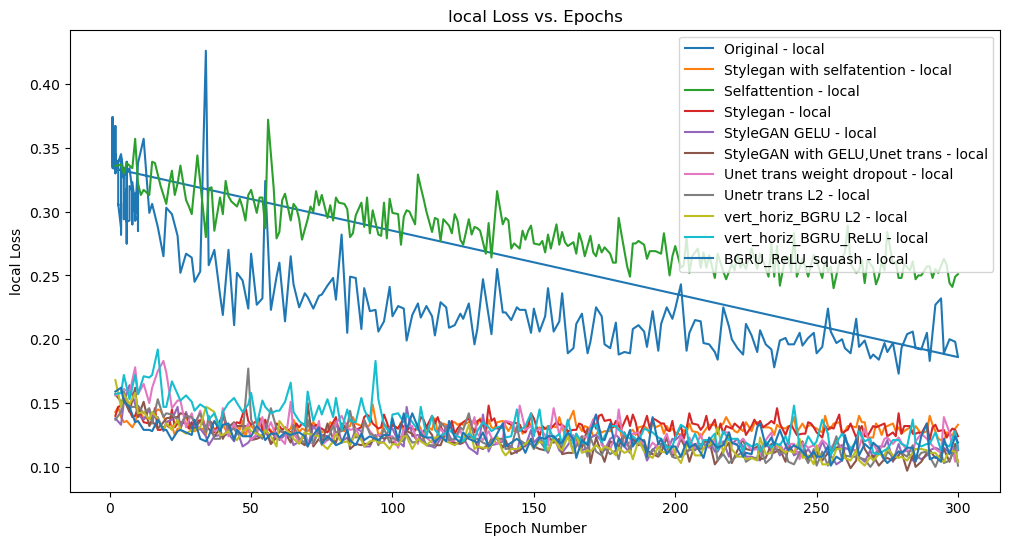

In [17]:
import re
import matplotlib.pyplot as plt

def parse_loss_log(log_file):
    epoch_numbers = []
    loss_values = {'local': []}
    epoch_losses = {'local': []}

    with open(log_file, 'r') as file:
        for line in file:
            # Check if the line contains NCE loss values
            if re.search(r'local: (\d+\.\d+)', line):
                epoch_match = re.search(r'epoch: (\d+)', line)
                if epoch_match:
                    epoch_number = int(epoch_match.group(1))
                    epoch_numbers.append(epoch_number)

                    # Extract NCE loss values
                    loss_match = re.search(r'local: (\d+\.\d+)', line)
                    if loss_match:
                        nce_loss = float(loss_match.group(1))
                        loss_values['local'].append(nce_loss)
                        epoch_losses['local'].append(nce_loss)

    return epoch_numbers, loss_values, epoch_losses

def plot_nce_loss(log_files, labels):
    plt.figure(figsize=(12, 6))

    for i, log_file in enumerate(log_files):
        epoch_numbers, loss_values, epoch_losses = parse_loss_log(log_file)
        plt.plot(epoch_numbers, loss_values['local'], label=f'{labels[i]} - local')

        # Calculate the average NCE loss over the last 50 epochs
        last_50_epochs = slice(-50, None)
        avg_nce_losses = sum(epoch_losses['local'][last_50_epochs]) / 50
        print(f'Average local Loss over the Last 50 Epochs for {labels[i]}: {avg_nce_losses}')

    plt.xlabel('Epoch Number')
    plt.ylabel('local Loss')
    plt.title('local Loss vs. Epochs')
    plt.legend()
    plt.show()

# Provide the paths to the NCE loss log files
log_files = [
    '/home/souraja/DFMIR/checkpoints/loss_log_orig.txt',
    '/home/souraja/DFMIR/checkpoints/loss_log_stylegan_selfattention.txt',
    '/home/souraja/DFMIR/checkpoints/loss_log_selfattention.txt',
    '/home/souraja/DFMIR/checkpoints/loss_log_stylegan2.txt',
    '/home/souraja/DFMIR/checkpoints/loss_log_stylrgan_GELU.txt',
    '/home/souraja/DFMIR/checkpoints/loss_log_unettrans.txt',
    '/home/souraja/DFMIR/checkpoints/loss_log_unet_weight_dropout.txt',
    '/home/souraja/DFMIR/results/UnettransL2one/loss_log_trans.txt',
    '/home/souraja/DFMIR/results/vert_horiz_BGRUunettrans/loss_log_vert_horiz_BGRU.txt',
    '/home/souraja/DFMIR/results/BGRU_ReLU/loss_log.txt',
    '/home/souraja/DFMIR/checkpoints/experiment_name/loss_log.txt'
]

# Provide the labels for the NCE loss logs

labels = [
    'Original',
    'Stylegan with selfatention',
    'Selfattention',
    'Stylegan',
    'StyleGAN GELU',
    'StyleGAN with GELU,Unet trans',
    'Unet trans weight dropout',
    'Unetr trans L2',
    'vert_horiz_BGRU L2',
    'vert_horiz_BGRU_ReLU',
    'BGRU_ReLU_squash'
]

plot_nce_loss(log_files, labels)


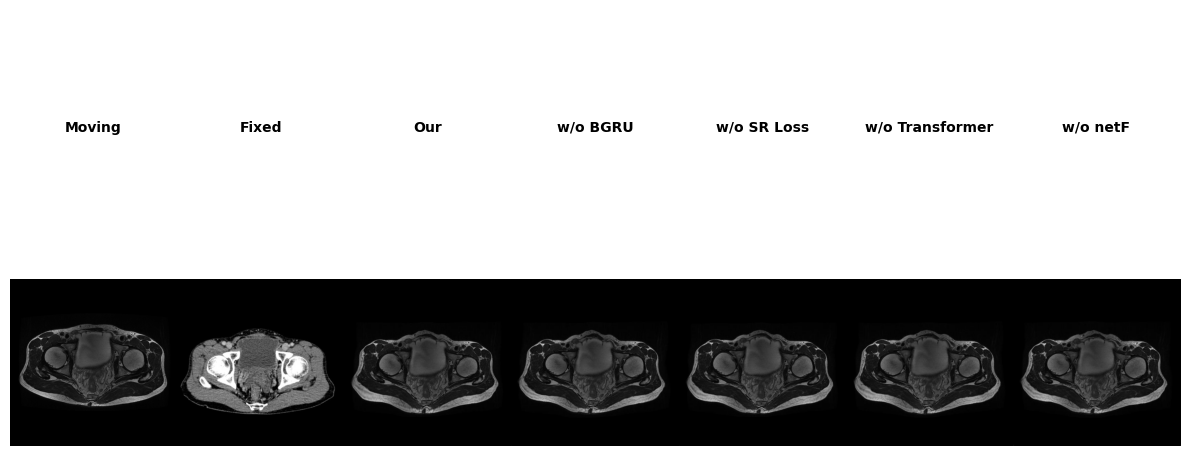

In [238]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# List of image file paths
image_paths = [
    '/home/souraja/DFMIR/Dataset/original_MRI/img23.2.jpg',
    '/home/souraja/DFMIR/Dataset/realCT599/img23.2.jpg',
    '/home/souraja/DFMIR/results/finalmodelMRICT/good/img23.2.jpg',
    '/home/souraja/DFMIR/results/withoutBGRUMRICT/good/img23.2.jpg',
    '/home/souraja/DFMIR/results/withoutsuperresolutionMRICT/good/img23.2.jpg',
    '/home/souraja/DFMIR/results/withouttransformerMRICT/good/img23.2.jpg',
    '/home/souraja/DFMIR/results/withoutnewnetFMRICT/good/img23.2.jpg'
    
]

# Number of rows and columns in the subplot
num_rows = 1
num_columns = 7

# Column labels
column_labels = ['Moving', 'Fixed', 'Our', 'w/o BGRU', 'w/o SR Loss', 'w/o Transformer', 'w/o netF']

# Create a subplot with no gaps between subplots
fig, axs = plt.subplots(num_rows + 1, num_columns, figsize=(12, 5), gridspec_kw={'wspace': 0, 'hspace': 0})  # Adjust figsize as needed

# Set column labels
for j in range(num_columns):
    axs[0, j].text(0.5, 0.5, column_labels[j], horizontalalignment='center', verticalalignment='center', fontsize=10, fontweight='bold')
    axs[0, j].axis('off')

# Loop through the images and display them in the subplot
for i in range(num_rows):
    for j in range(num_columns):
        # Calculate the index in the image_paths list
        index = i * num_columns + j

        # Check if the index is within the range of the image_paths list
        if index < len(image_paths):
            # Read and display the image
            img = mpimg.imread(image_paths[index])
            axs[i + 1, j].imshow(img)
            axs[i + 1, j].axis('off')  # Turn off axis labels
        else:
            # If the index is out of range, remove the subplot
            axs[i + 1, j].axis('off')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


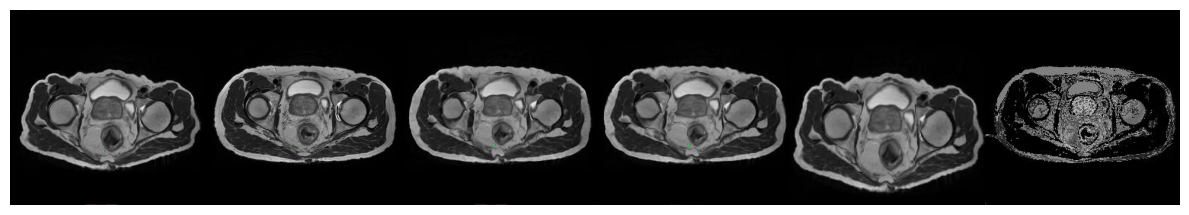

In [26]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# List of image file paths
image_paths = [
    '/home/souraja/DFMIR/Dataset/reglabeledMRI102/img1.1resized.jpg',
    '/home/souraja/Downloads/img1.1.jpg',
    '/home/souraja/DFMIR/results/superresolutiononly1/good/img1.1.jpg',
    '/home/souraja/DFMIR/results/original/good/img1.1.jpg',  
    '/home/souraja/nemar/results/affine1mono/good/img1.1.jpg',
    '/home/souraja/nemar/results/unet1mono/good/img1.1.jpg',
]

# Number of rows and columns in the subplot
num_rows = 1
num_columns = len(image_paths)

# Create a subplot with no gaps between subplots
fig, axs = plt.subplots(num_rows, num_columns, figsize=(12, 5), gridspec_kw={'wspace': 0, 'hspace': 0})

# Loop through the images and display them in the subplot
for j in range(num_columns):
    # Read and display the image
    img = mpimg.imread(image_paths[j])
    axs[j].imshow(img)
    axs[j].axis('off')  # Turn off axis labels

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


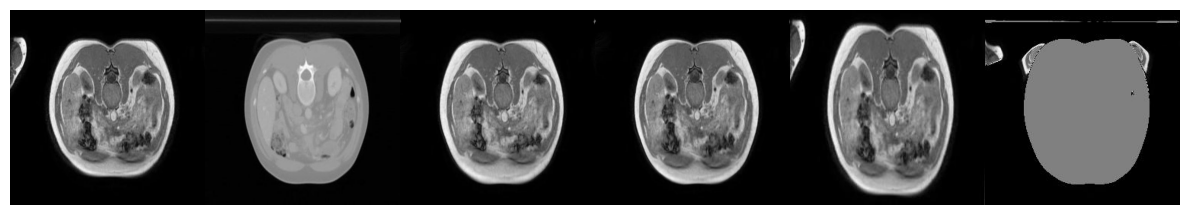

In [248]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# List of image file paths
image_paths = [
    '/home/souraja/DFMIR/Dataset/testAdataset2/image2.0141resized.jpg',
    '/home/souraja/DFMIR/Dataset/testBdataset2/image2.0141resized.jpg',
    '/home/souraja/DFMIR/results/finalmodel2/image2.0141.jpg',
    '/home/souraja/DFMIR/results/original2/image2.0141.jpg',  
    '/home/souraja/nemar/results/affine2multi/image2.0141.jpg',
    '/home/souraja/nemar/results/unet2/image2.0141.jpg',
]

# Number of rows and columns in the subplot
num_rows = 1
num_columns = len(image_paths)

# Create a subplot with no gaps between subplots
fig, axs = plt.subplots(num_rows, num_columns, figsize=(12, 5), gridspec_kw={'wspace': 0, 'hspace': 0})

# Loop through the images and display them in the subplot
for j in range(num_columns):
    # Read and display the image
    img = mpimg.imread(image_paths[j])
    axs[j].imshow(img)
    axs[j].axis('off')  # Turn off axis labels

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


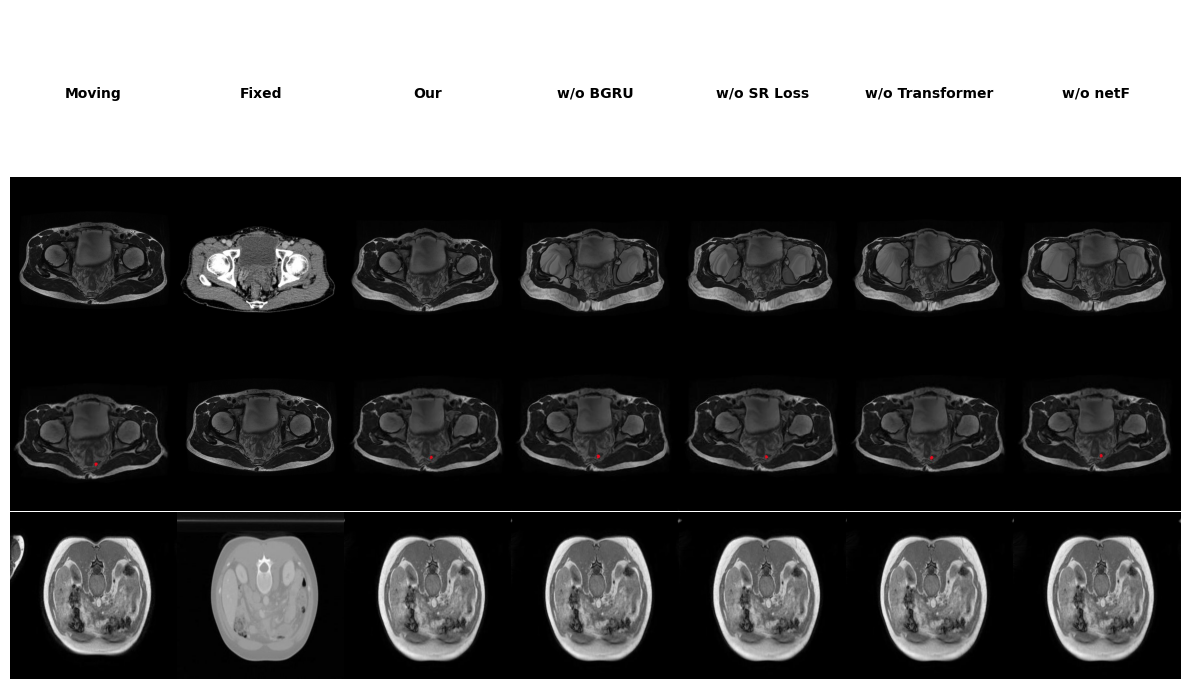

In [110]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# List of image file paths
image_paths = [
    '/home/souraja/DFMIR/Dataset/original_MRI/img23.2.jpg',
    '/home/souraja/DFMIR/Dataset/realCT599/img23.2.jpg',
    '/home/souraja/DFMIR/Dataset/deform_trainA/img23.2.jpg',
    '/home/souraja/DFMIR/results/withoutBGRUMRICT/good/img23.2.jpg',
    '/home/souraja/DFMIR/results/withoutsuperresolutionMRICT/good/img23.2.jpg',
    '/home/souraja/DFMIR/results/withouttransformerMRICT/good/img23.2.jpg',
    '/home/souraja/DFMIR/results/withoutnewnetFMRICT/good/img23.2.jpg',
    '/home/souraja/DFMIR/Dataset/regMRIlabelled/img23.2resized.jpg',
    '/home/souraja/DFMIR/Dataset/original_MRI/img23.2.jpg',
    '/home/souraja/DFMIR/results/superresolutiononly1/good/img23.2.jpg',
    '/home/souraja/DFMIR/results/Unet _trans_both_L2/good_registered_MRI/img23.2.jpg',
    '/home/souraja/DFMIR/results/onlyBGRU_ReLU_Squash/good_registered_MRI/img23.2.jpg',
    '/home/souraja/DFMIR/results/withouttransformer1/good/img23.2.jpg',
    '/home/souraja/DFMIR/results/withoutnewnetF1/good/img23.2.jpg',
    '/home/souraja/DFMIR/Dataset/testAdataset2/image2.0141resized.jpg',
    '/home/souraja/DFMIR/Dataset/testBdataset2/image2.0141resized.jpg',
    '/home/souraja/DFMIR/results/finalmodel2/image2.0141.jpg',
    '/home/souraja/DFMIR/results/withoutBGRUReLUSquash2/image2.0141.jpg',
    '/home/souraja/DFMIR/results/withoutsuperresolution2/image2.0141.jpg',
    '/home/souraja/DFMIR/results/withouttransformer2/image2.0141.jpg',
    '/home/souraja/DFMIR/results/withoutnewnetF2/image2.0141.jpg'
]

# Number of rows and columns in the subplot
num_rows = 3
num_columns = 7

# Column labels
column_labels = ['Moving', 'Fixed', 'Our', 'w/o BGRU', 'w/o SR Loss', 'w/o Transformer', 'w/o netF']

# Customize row spacing for each row
row_spacings = [0.5, 0.5, 0.0]  # Adjust these values for the desired row spacings

# Create a subplot with customizable gaps between subplots
fig, axs = plt.subplots(num_rows + 1, num_columns, figsize=(12, 7), gridspec_kw={'wspace': 0, 'hspace': 0})  # Adjust figsize as needed

# Set column labels
for j in range(num_columns):
    axs[0, j].text(0.5, 0.5, column_labels[j], horizontalalignment='center', verticalalignment='center', fontsize=10, fontweight='bold')
    axs[0, j].axis('off')

# Loop through the images and display them in the subplot
for i in range(num_rows):
    for j in range(num_columns):
        # Calculate the index in the image_paths list
        index = i * num_columns + j

        # Check if the index is within the range of the image_paths list
        if index < len(image_paths):
            # Read and display the image
            img = mpimg.imread(image_paths[index])
            axs[i + 1, j].imshow(img)
            axs[i + 1, j].axis('off')  # Turn off axis labels
        else:
            # If the index is out of range, remove the subplot
            axs[i + 1, j].axis('off')

# Customize row spacing
for i, row_spacing in enumerate(row_spacings):
    axs[i + 1, 0].margins(y=row_spacing)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


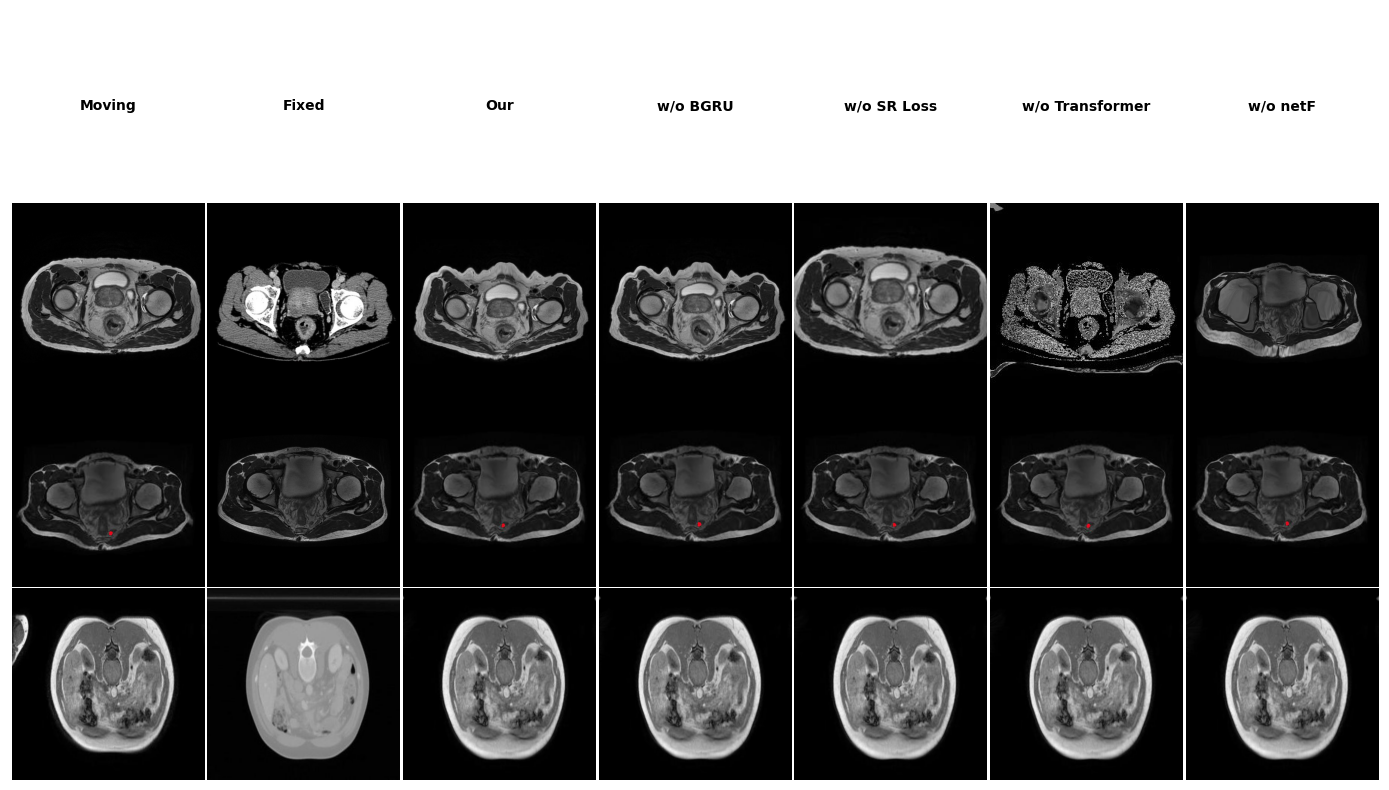

In [97]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# List of image file paths
image_paths = [
    '/home/souraja/nemar/Dataset/trainA/img1.1.jpg',
    '/home/souraja/nemar/Dataset/trainB/img1.1.jpg',
    '/home/souraja/DFMIR/Dataset/deform_trainA/img1.1.jpg',
    '/home/souraja/DFMIR/results/originalMRICT1/good/img1.1.jpg',
    '/home/souraja/nemar/results/affinemulti1/img1.1.jpg',
    '/home/souraja/nemar/results/unetmulti1/img1.1.jpg',
    '/home/souraja/DFMIR/results/withoutnewnetFMRICT/good/img23.2.jpg',
    '/home/souraja/DFMIR/Dataset/regMRIlabelled/img23.2resized.jpg',
    '/home/souraja/DFMIR/Dataset/original_MRI/img23.2.jpg',
    '/home/souraja/DFMIR/results/superresolutiononly1/good/img23.2.jpg',
    '/home/souraja/DFMIR/results/Unet _trans_both_L2/good_registered_MRI/img23.2.jpg',
    '/home/souraja/DFMIR/results/onlyBGRU_ReLU_Squash/good_registered_MRI/img23.2.jpg',
    '/home/souraja/DFMIR/results/withouttransformer1/good/img23.2.jpg',
    '/home/souraja/DFMIR/results/withoutnewnetF1/good/img23.2.jpg',
    '/home/souraja/DFMIR/Dataset/testAdataset2/image2.0141resized.jpg',
    '/home/souraja/DFMIR/Dataset/testBdataset2/image2.0141resized.jpg',
    '/home/souraja/DFMIR/results/finalmodel2/image2.0141.jpg',
    '/home/souraja/DFMIR/results/withoutBGRUReLUSquash2/image2.0141.jpg',
    '/home/souraja/DFMIR/results/withoutsuperresolution2/image2.0141.jpg',
    '/home/souraja/DFMIR/results/withouttransformer2/image2.0141.jpg',
    '/home/souraja/DFMIR/results/withoutnewnetF2/image2.0141.jpg'
]

# Number of rows and columns in the subplot
num_rows = 3
num_columns = 7

# Column labels
column_labels = ['Moving', 'Fixed', 'Our', 'w/o BGRU', 'w/o SR Loss', 'w/o Transformer', 'w/o netF']

# Create a subplot with no gaps between subplots
fig, axs = plt.subplots(num_rows + 1, num_columns, figsize=(14, 8), gridspec_kw={'wspace': 0, 'hspace': 0})  # Adjust figsize as needed

# Set column labels
for j in range(num_columns):
    axs[0, j].text(0.5, 0.5, column_labels[j], horizontalalignment='center', verticalalignment='center', fontsize=10, fontweight='bold')
    axs[0, j].axis('off')

# Loop through the images and display them in the subplot
for i in range(num_rows):
    for j in range(num_columns):
        # Calculate the index in the image_paths list
        index = i * num_columns + j

        # Check if the index is within the range of the image_paths list
        if index < len(image_paths):
            # Read and display the image
            img = mpimg.imread(image_paths[index])
            axs[i + 1, j].imshow(img)
            axs[i + 1, j].axis('off')  # Turn off axis labels
        else:
            # If the index is out of range, remove the subplot
            axs[i + 1, j].axis('off')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [243]:
from PIL import Image

def resize_image(source_path, target_path):
    # Open the source image
    source_image = Image.open(source_path)

    # Open the target image to get its size
    target_image = Image.open(target_path)

    # Resize the source image to the size of the target image
    resized_image = source_image.resize(target_image.size, Image.ANTIALIAS)

    # Save the resized image
    resized_image.save('/home/souraja/DFMIR/Dataset/reglabeledMRI102/img1.1resized.jpg')  # You can change the output filename and format if needed

# Example usage
source_image_path = '/home/souraja/DFMIR/Dataset/reglabeledMRI102/img1.1.jpg'
target_image_path = '/home/souraja/DFMIR/results/superresolutiononly1/good/img1.1.jpg'
resize_image(source_image_path, target_image_path)


/tmp/ipykernel_615789/3138363596.py:11: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_image = source_image.resize(target_image.size, Image.ANTIALIAS)


In [16]:
import cv2
from skimage.metrics import structural_similarity as ssim
import numpy as np

def preprocess_image(image):
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray_image

def calculate_shape_similarity(original_image, registered_image):
    # Preprocess images
    original_gray = preprocess_image(original_image)
    registered_gray = preprocess_image(registered_image)

    # Ensure both images have the same dimensions
    min_height = min(original_gray.shape[0], registered_gray.shape[0])
    min_width = min(original_gray.shape[1], registered_gray.shape[1])

    original_gray = original_gray[:min_height, :min_width]
    registered_gray = registered_gray[:min_height, :min_width]

    # Calculate SSIM
    similarity_index, _ = ssim(original_gray, registered_gray, full=True)

    return similarity_index

# Example usage
original_ct_image = cv2.imread('/home/souraja/DFMIR/Dataset/testB/img1.3.jpg')
registered_mri_image = cv2.imread('/home/souraja/DFMIR/results/UnettransL2one/reg_image_with_real_MRI_labeled/img1.3.jpg')

shape_similarity = calculate_shape_similarity(original_ct_image, registered_mri_image)
print(f'Structural Similarity Index (SSIM): {shape_similarity}')


Structural Similarity Index (SSIM): 0.42433198551159057


In [5]:
import cv2
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import mean_squared_error
import numpy as np

def preprocess_image(image):
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray_image

def calculate_shape_similarity_metrics(reference_image, registered_images):
    # Preprocess reference image
    reference_gray = preprocess_image(reference_image)

    # Calculate metrics for each registered image
    results = []
    for registered_image in registered_images:
        # Preprocess registered image
        registered_gray = preprocess_image(registered_image)

        # Ensure both images have the same dimensions
        min_height = min(reference_gray.shape[0], registered_gray.shape[0])
        min_width = min(reference_gray.shape[1], registered_gray.shape[1])

        reference_gray = reference_gray[:min_height, :min_width]
        registered_gray = registered_gray[:min_height, :min_width]

        # Calculate SSIM
        ssim_index, _ = ssim(reference_gray, registered_gray, full=True)

        # Calculate MSE
        mse = mean_squared_error(reference_gray.flatten(), registered_gray.flatten())

        # Calculate NCC
        ncc = np.corrcoef(reference_gray.flatten(), registered_gray.flatten())[0, 1]

        results.append((ssim_index, mse, ncc))

    return results

# Example usage
reference_ct_image = cv2.imread('/home/souraja/DFMIR/Dataset/testB/img1.3.jpg')

registered_mri_images = [
    cv2.imread('/home/souraja/DFMIR/results/unettransL2BGRU/reg_MRI_with_real_MRI_labeled/img1.3.jpg'),
    cv2.imread('/home/souraja/DFMIR/results/UnettransL2one/reg_image_with_real_MRI_labeled/img1.3.jpg'),
    cv2.imread('/home/souraja/DFMIR/Dataset/deform_trainA/img1.3.jpg')
]

results = calculate_shape_similarity_metrics(reference_ct_image, registered_mri_images)

for i, (ssim_index, mse, ncc) in enumerate(results, 1):
    print(f'Model {i}:')
    print(f'Structural Similarity Index (SSIM): {ssim_index}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Normalized Cross-Correlation (NCC): {ncc}')
    print('---')


Model 1:
Structural Similarity Index (SSIM): 0.4195927521593884
Mean Squared Error (MSE): 53.80144119262695
Normalized Cross-Correlation (NCC): -0.12722528054234916
---
Model 2:
Structural Similarity Index (SSIM): 0.42433198551159057
Mean Squared Error (MSE): 53.4278564453125
Normalized Cross-Correlation (NCC): -0.12709111650795707
---
Model 3:
Structural Similarity Index (SSIM): 0.41768794373186585
Mean Squared Error (MSE): 53.69215393066406
Normalized Cross-Correlation (NCC): -0.1268864446777759
---


Average R Loss over the Last 50 Epochs for Original: 0.7293399999999999
Average R Loss over the Last 50 Epochs for Unet transformer L2: 0.18748000000000004
Average R Loss over the Last 50 Epochs for Unet trans with BGRU: 0.15693999999999997
Average R Loss over the Last 50 Epochs for vert_horiz_BGRU unet trans: 0.16510000000000002
Average R Loss over the Last 50 Epochs for BGRU_ReLU_squash: 0.15918000000000002
Average R Loss over the Last 50 Epochs for Unet trans both L2: 0.15863999999999995
Average R Loss over the Last 50 Epochs for Only BGRU ReLU Squash: 0.15575999999999998
Average R Loss over the Last 50 Epochs for smallstylegan2 with BGRU: 0.10608000000000002
Average R Loss over the Last 50 Epochs for StyleUnet smallstylegan2: 0.12076000000000002
Average R Loss over the Last 50 Epochs for styleGAN SSIM: 0.5590999999999998


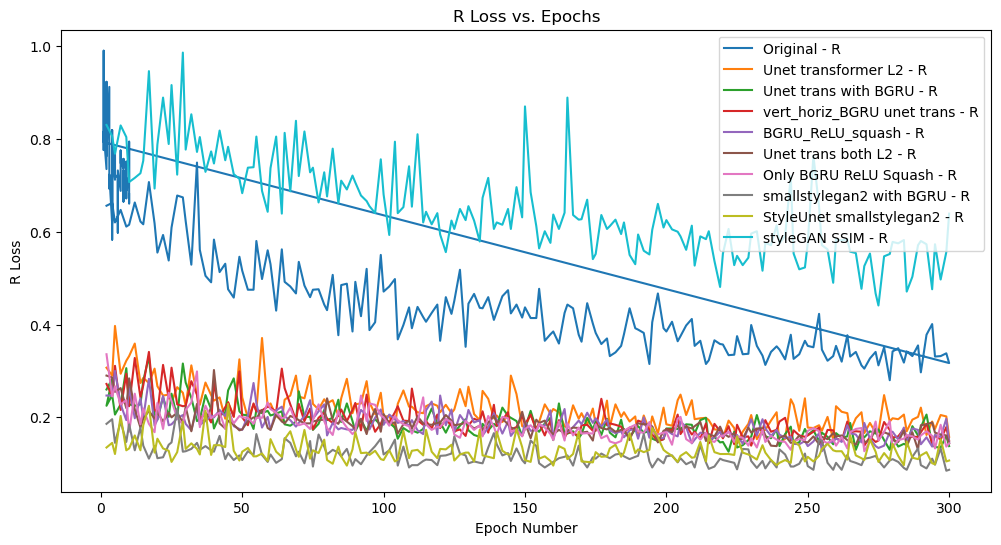

In [74]:
import re
import matplotlib.pyplot as plt

def parse_loss_log(log_file):
    epoch_numbers = []
    loss_values = {'R': []}
    epoch_losses = {'R': []}

    with open(log_file, 'r') as file:
        for line in file:
            # Check if the line contains NCE loss values
            if re.search(r'R: (\d+\.\d+)', line):
                epoch_match = re.search(r'epoch: (\d+)', line)
                if epoch_match:
                    epoch_number = int(epoch_match.group(1))
                    epoch_numbers.append(epoch_number)

                    # Extract NCE loss values
                    loss_match = re.search(r'R: (\d+\.\d+)', line)
                    if loss_match:
                        nce_loss = float(loss_match.group(1))
                        loss_values['R'].append(nce_loss)
                        epoch_losses['R'].append(nce_loss)

    return epoch_numbers, loss_values, epoch_losses

def plot_nce_loss(log_files, labels):
    plt.figure(figsize=(12, 6))

    for i, log_file in enumerate(log_files):
        epoch_numbers, loss_values, epoch_losses = parse_loss_log(log_file)
        plt.plot(epoch_numbers, loss_values['R'], label=f'{labels[i]} - R')

        # Calculate the average NCE loss over the last 50 epochs
        last_50_epochs = slice(-50, None)
        avg_nce_losses = sum(epoch_losses['R'][last_50_epochs]) / 50
        print(f'Average R Loss over the Last 50 Epochs for {labels[i]}: {avg_nce_losses}')

    plt.xlabel('Epoch Number')
    plt.ylabel('R Loss')
    plt.title('R Loss vs. Epochs')
    plt.legend()
    plt.show()

# Provide the paths to the NCE loss log files
log_files = [
    '/home/souraja/DFMIR/checkpoints/loss_log_orig.txt',
    '/home/souraja/DFMIR/results/UnettransL2one/loss_log_trans.txt',
    '/home/souraja/DFMIR/results/unettransL2BGRU/loss_log_transBGRU.txt',
    '/home/souraja/DFMIR/results/BGRU_ReLU/loss_log.txt',
    '/home/souraja/DFMIR/results/BGRU_ReLU_squash/loss_log.txt',
    '/home/souraja/DFMIR/results/Unet _trans_both_L2/loss_log.txt',
    '/home/souraja/DFMIR/results/onlyBGRU_ReLU_Squash/loss_log.txt',
    '/home/souraja/DFMIR/results/smallstylegan2_BGRU/loss_log.txt',
    '/home/souraja/DFMIR/results/styleunet_smallstylegan2_BGRU/loss_log.txt',
    '/home/souraja/DFMIR/checkpoints/experiment_name/loss_log.txt'
]

# Provide the labels for the NCE loss logs

labels = [
    'Original',
    'Unet transformer L2',
    'Unet trans with BGRU',
    'vert_horiz_BGRU unet trans',
    'BGRU_ReLU_squash',
    'Unet trans both L2',
    'Only BGRU ReLU Squash',
    'smallstylegan2 with BGRU',
    'StyleUnet smallstylegan2',
    'styleGAN SSIM'
]

plot_nce_loss(log_files, labels)


Average local Loss over the Last 50 Epochs for Original: 0.3091999999999999
Average local Loss over the Last 50 Epochs for Unet trans one L2: 0.1082
Average local Loss over the Last 50 Epochs for Unet trans only BGRU: 0.11262000000000003
Average local Loss over the Last 50 Epochs for vert_horiz_BGRU both L2: 0.10992
Average local Loss over the Last 50 Epochs for vert_horiz_BGRU_ReLU: 0.11962000000000002
Average local Loss over the Last 50 Epochs for BGRU_ReLU_squash: 0.11470000000000001
Average local Loss over the Last 50 Epochs for Unet trans both L2: 0.11606000000000004
Average local Loss over the Last 50 Epochs for Only BGRU relu squash: 0.11230000000000002
Average local Loss over the Last 50 Epochs for small stylegan2 with BGRU: 0.06020000000000001
Average local Loss over the Last 50 Epochs for StyleUnet smallstylegan2: 0.06258
Average local Loss over the Last 50 Epochs for styleganSSIM: 0.11374000000000001


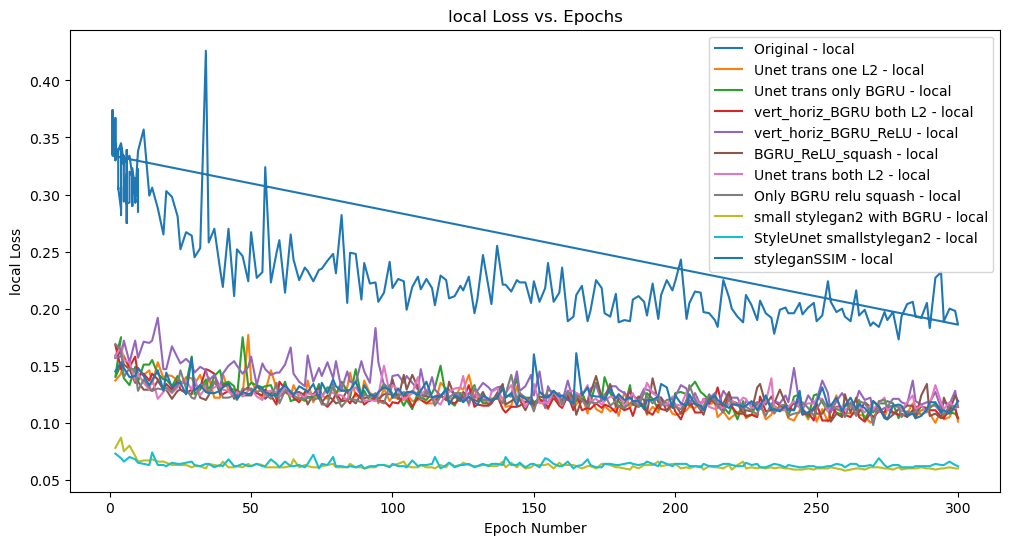

In [76]:
import re
import matplotlib.pyplot as plt

def parse_loss_log(log_file):
    epoch_numbers = []
    loss_values = {'local': []}
    epoch_losses = {'local': []}

    with open(log_file, 'r') as file:
        for line in file:
            # Check if the line contains NCE loss values
            if re.search(r'local: (\d+\.\d+)', line):
                epoch_match = re.search(r'epoch: (\d+)', line)
                if epoch_match:
                    epoch_number = int(epoch_match.group(1))
                    epoch_numbers.append(epoch_number)

                    # Extract NCE loss values
                    loss_match = re.search(r'local: (\d+\.\d+)', line)
                    if loss_match:
                        nce_loss = float(loss_match.group(1))
                        loss_values['local'].append(nce_loss)
                        epoch_losses['local'].append(nce_loss)

    return epoch_numbers, loss_values, epoch_losses

def plot_nce_loss(log_files, labels):
    plt.figure(figsize=(12, 6))

    for i, log_file in enumerate(log_files):
        epoch_numbers, loss_values, epoch_losses = parse_loss_log(log_file)
        plt.plot(epoch_numbers, loss_values['local'], label=f'{labels[i]} - local')

        # Calculate the average NCE loss over the last 50 epochs
        last_50_epochs = slice(-50, None)
        avg_nce_losses = sum(epoch_losses['local'][last_50_epochs]) / 50
        print(f'Average local Loss over the Last 50 Epochs for {labels[i]}: {avg_nce_losses}')

    plt.xlabel('Epoch Number')
    plt.ylabel('local Loss')
    plt.title('local Loss vs. Epochs')
    plt.legend()
    plt.show()

# Provide the paths to the NCE loss log files
log_files = [
    '/home/souraja/DFMIR/checkpoints/loss_log_orig.txt',
    '/home/souraja/DFMIR/results/UnettransL2one/loss_log_trans.txt',
    '/home/souraja/DFMIR/results/unettransL2BGRU/loss_log_transBGRU.txt',
    '/home/souraja/DFMIR/results/vert_horiz_BGRUunettrans/loss_log_vert_horiz_BGRU.txt',
    '/home/souraja/DFMIR/results/BGRU_ReLU/loss_log.txt',
    '/home/souraja/DFMIR/results/BGRU_ReLU_squash/loss_log.txt',
    '/home/souraja/DFMIR/results/Unet _trans_both_L2/loss_log.txt',
    '/home/souraja/DFMIR/results/onlyBGRU_ReLU_Squash/loss_log.txt',
    '/home/souraja/DFMIR/results/smallstylegan2_BGRU/loss_log.txt',
    '/home/souraja/DFMIR/results/styleunet_smallstylegan2_BGRU/loss_log.txt',
    '/home/souraja/DFMIR/checkpoints/experiment_name/loss_log.txt'
]

# Provide the labels for the NCE loss logs

labels = [
    'Original',
    'Unet trans one L2',
    'Unet trans only BGRU',
    'vert_horiz_BGRU both L2',
    'vert_horiz_BGRU_ReLU',
    'BGRU_ReLU_squash',
    'Unet trans both L2',
    'Only BGRU relu squash',
    'small stylegan2 with BGRU',
    'StyleUnet smallstylegan2',
    'styleganSSIM'
]

plot_nce_loss(log_files, labels)


In [105]:
import os
import numpy as np
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import mean_squared_error
import numpy as np
from PIL import Image

def resize_image(image, target_size=(512, 512)):
    # Resize the image to the target size
    return image.resize(target_size)

def preprocess_image(image):
    # Convert to grayscale
    gray_image = np.array(image.convert("L"))
    return gray_image

def calculate_metrics(original_folder, registered_folder):
    # Get a list of all files in the original and registered folders
    original_files = os.listdir(original_folder)
    registered_files = os.listdir(registered_folder)

    # Initialize empty lists to store metric values
    ssim_values = []
    mse_values = []
    ncc_values = []

    # Iterate over the files and calculate metrics for each pair
    for original_file in original_files:
        if original_file in registered_files:
            # Construct the file paths
            original_image_path = os.path.join(original_folder, original_file)
            registered_image_path = os.path.join(registered_folder, original_file)

            # Read and resize the images using the PIL library
            original_image = Image.open(original_image_path)
            registered_image = Image.open(registered_image_path)

            # Resize images to a common size of (512, 512)
            original_image = resize_image(original_image)
            registered_image = resize_image(registered_image)

            # Convert the images to NumPy arrays
            original_image_np = preprocess_image(original_image)
            registered_image_np = preprocess_image(registered_image)

            # Calculate SSIM
            ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)

            # Calculate MSE
            mse = mean_squared_error(original_image_np.flatten(), registered_image_np.flatten())

            # Calculate NCC
            ncc = np.corrcoef(original_image_np.flatten(), registered_image_np.flatten())[0, 1]

            ssim_values.append(ssim_score)
            mse_values.append(mse)
            ncc_values.append(ncc)

    # Convert the lists to NumPy arrays for easier calculations
    ssim_values = np.array(ssim_values)
    mse_values = np.array(mse_values)
    ncc_values = np.array(ncc_values)

    # Calculate mean and standard deviation of the metrics
    mean_ssim = np.mean(ssim_values)
    std_ssim = np.std(ssim_values)
    mean_mse = np.mean(mse_values)
    std_mse = np.std(mse_values)
    mean_ncc = np.mean(ncc_values)
    std_ncc = np.std(ncc_values)

    return mean_ssim, std_ssim, mean_mse, std_mse, mean_ncc, std_ncc

# Example usage
original_folder = '/home/souraja/DFMIR/Dataset/testB'
registered_folder = '/home/souraja/DFMIR/Dataset/deform_trainA'

# Calculate the mean and standard deviation of SSIM, MSE, and NCC
mean_ssim, std_ssim, mean_mse, std_mse, mean_ncc, std_ncc = calculate_metrics(original_folder, registered_folder)

# Print the results
print(f"Mean SSIM: {mean_ssim:.4f}")
print(f"Standard Deviation of SSIM: {std_ssim:.4f}")
print(f"Mean MSE: {mean_mse:.2f}")
print(f"Standard Deviation of MSE: {std_mse:.2f}")
print(f"Mean NCC: {mean_ncc:.4f}")
print(f"Standard Deviation of NCC: {std_ncc:.4f}")



/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please 

/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please 

/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please 

/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please 

/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please 

/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please 

/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please 

/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please 

/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please 

/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please 

/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please 

/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please 

/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please 

/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please 

/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please 

/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please 

/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please 

/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please 

Mean SSIM: 0.5461
Standard Deviation of SSIM: 0.0543
Mean MSE: 44.41
Standard Deviation of MSE: 4.46
Mean NCC: 0.6951
Standard Deviation of NCC: 0.0511


/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_score = ssim(original_image_np, registered_image_np, multichannel=False)
/tmp/ipykernel_201475/72650243.py:47: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please 

In [115]:
import os
import random
import shutil

def copy_random_images(source_folder, destination_folder, num_images=599):
    # Get a list of all files in the source folder
    all_files = os.listdir(source_folder)

    # Filter only image files (you can adjust the file extensions as needed)
    image_files = [file for file in all_files if file.lower().endswith('.jpg')]

    # Ensure that the number of requested images does not exceed the available number of images
    num_images = min(num_images, len(image_files))

    # Randomly select num_images from the list
    selected_files = random.sample(image_files, num_images)

    # Copy selected images to the destination folder
    for file in selected_files:
        source_path = os.path.join(source_folder, file)
        destination_path = os.path.join(destination_folder, file)
        shutil.copy2(source_path, destination_path)

# Example usage
source_folder = '/home/souraja/DFMIR/Dataset/ct'
destination_folder = '/home/souraja/DFMIR/Dataset/testB'

# Ensure the destination folder exists, create if necessary
os.makedirs(destination_folder, exist_ok=True)

# Copy 60 random images from the source folder to the destination folder
copy_random_images(source_folder, destination_folder, num_images=599)


In [18]:
from PIL import Image
import os

def convert_images_to_grayscale(input_folder, output_folder):
    # Make sure the output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Loop through all files in the input folder
    for filename in os.listdir(input_folder):
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename)

        # Check if the file is an image
        if os.path.isfile(input_path) and filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Open the image
            img = Image.open(input_path)

            # Convert to grayscale
            grayscale_img = img.convert('L')

            # Save the grayscale image
            grayscale_img.save(output_path)

            print(f"Converted and saved: {filename}")

# Example usage
input_folder = '/home/souraja/keymorph/data/centered_IXI/source2'
output_folder = '/home/souraja/keymorph/data/centered_IXI/T2'

convert_images_to_grayscale(input_folder, output_folder)


Converted and saved: img34.14.jpg
Converted and saved: img20.9.jpg
Converted and saved: img1.1.jpg
Converted and saved: img8.12.jpg
Converted and saved: img29.2.jpg
Converted and saved: img53.22.jpg
Converted and saved: img44.4.jpg
Converted and saved: img1.2.jpg
Converted and saved: img27.8.jpg
Converted and saved: img7.6.jpg
Converted and saved: img9.12.jpg
Converted and saved: img39.7.jpg
Converted and saved: img36.23.jpg
Converted and saved: img37.4.jpg
Converted and saved: img1.4.jpg
Converted and saved: img24.10.jpg
Converted and saved: img33.14.jpg
Converted and saved: img38.4.jpg
Converted and saved: img35.2.jpg
Converted and saved: img53.2.jpg
Converted and saved: img24.8.jpg
Converted and saved: img27.7.jpg
Converted and saved: img40.3.jpg
Converted and saved: img48.23.jpg
Converted and saved: img13.3.jpg
Converted and saved: img13.10.jpg
Converted and saved: img21.13.jpg
Converted and saved: img24.2.jpg
Converted and saved: img44.13.jpg
Converted and saved: img7.12.jpg
Conve

Converted and saved: img7.17.jpg
Converted and saved: img45.10.jpg
Converted and saved: img40.8.jpg
Converted and saved: img25.12.jpg
Converted and saved: img3.7.jpg
Converted and saved: img33.11.jpg
Converted and saved: img3.15.jpg
Converted and saved: img47.14.jpg
Converted and saved: img28.11.jpg
Converted and saved: img32.7.jpg
Converted and saved: img53.19.jpg
Converted and saved: img3.14.jpg
Converted and saved: img48.17.jpg
Converted and saved: img39.10.jpg
Converted and saved: img46.11.jpg
Converted and saved: img25.9.jpg
Converted and saved: img33.12.jpg
Converted and saved: img34.15.jpg
Converted and saved: img15.9.jpg
Converted and saved: img42.3.jpg
Converted and saved: img21.6.jpg
Converted and saved: img9.16.jpg
Converted and saved: img14.4.jpg
Converted and saved: img39.6.jpg
Converted and saved: img43.22.jpg
Converted and saved: img18.2.jpg
Converted and saved: img39.1.jpg
Converted and saved: img30.7.jpg
Converted and saved: img39.13.jpg
Converted and saved: img11.2.jp

Converted and saved: img20.6.jpg
Converted and saved: img38.12.jpg
Converted and saved: img24.26.jpg
Converted and saved: img3.13.jpg
Converted and saved: img38.2.jpg
Converted and saved: img28.5.jpg
Converted and saved: img23.3.jpg
Converted and saved: img33.6.jpg
Converted and saved: img53.20.jpg
Converted and saved: img49.1.jpg
Converted and saved: img9.3.jpg
Converted and saved: img37.11.jpg
Converted and saved: img47.2.jpg
Converted and saved: img28.13.jpg
Converted and saved: img3.11.jpg
Converted and saved: img24.17.jpg
Converted and saved: img20.4.jpg
Converted and saved: img37.2.jpg
Converted and saved: img44.3.jpg
Converted and saved: img21.5.jpg
Converted and saved: img32.1.jpg
Converted and saved: img9.5.jpg
Converted and saved: img48.15.jpg
Converted and saved: img54.8.jpg
Converted and saved: img49.2.jpg
Converted and saved: img11.3.jpg
Converted and saved: img5.5.jpg
Converted and saved: img8.8.jpg
Converted and saved: img47.1.jpg
Converted and saved: img54.12.jpg
Conver

In [20]:
import re
import numpy as np

# Read the content of the file
with open('/home/souraja/Downloads/Keymorph evaluation', 'r') as file:
    content = file.read()

# Extract MSE, SSIM, and NCC values using regular expressions
mse_values = [float(match.group(1)) for match in re.finditer(r'\[Eval Stat\] mse: (\d+\.\d+)', content)]
ssim_values = [float(match.group(1)) for match in re.finditer(r'\[Eval Stat\] ssim: (\d+\.\d+)', content)]
ncc_values = [float(match.group(1)) for match in re.finditer(r'\[Eval Stat\] ncc: (\d+\.\d+)', content)]

# Calculate mean and standard deviation
mse_mean = np.mean(mse_values)
mse_std = np.std(mse_values)

ssim_mean = np.mean(ssim_values)
ssim_std = np.std(ssim_values)

ncc_mean = np.mean(ncc_values)
ncc_std = np.std(ncc_values)

# Print the results
print(f'Mean MSE: {mse_mean}, Std MSE: {mse_std}')
print(f'Mean SSIM: {ssim_mean}, Std SSIM: {ssim_std}')
print(f'Mean NCC: {ncc_mean}, Std NCC: {ncc_std}')


Mean MSE: 60.028721836393984, Std MSE: 11.705503228757806
Mean SSIM: 0.9274317863105174, Std SSIM: 0.010586954787246026
Mean NCC: 0.11808761268781302, Std NCC: 0.07472401090336392


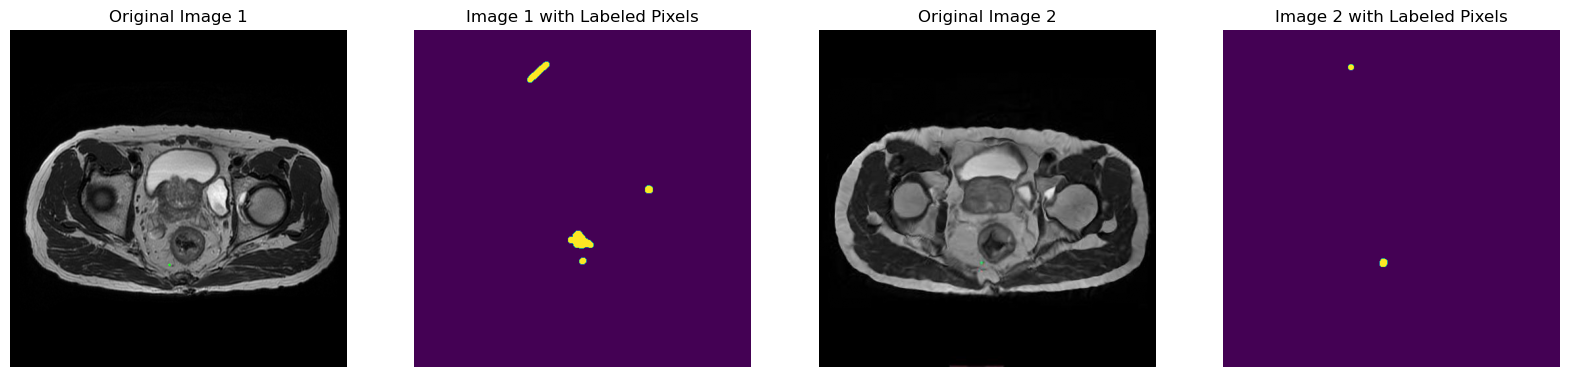

Centroid Distance: 66.60123642917885


In [55]:
import numpy as np
from scipy.ndimage import distance_transform_edt
from skimage import io, transform, color
import matplotlib.pyplot as plt
from skimage.draw import disk

def resize_image(image, target_size=(512, 512)):
    # Resize the image to the target size
    resized_image = transform.resize(image, target_size, anti_aliasing=True)
    return resized_image

def collect_green_pixels(image, threshold=0.91):
    # Collect coordinates of pixels with green value greater than the threshold
    green_pixels = np.argwhere(image[:, :, 1] > threshold)
    return green_pixels[:, ::-1]  # Reverse the order of columns (y, x)

def calculate_centroid(coordinates):
    # Calculate centroid of coordinates
    centroid = np.mean(coordinates, axis=0)
    return centroid

def visualize_images(image1, image2, labels1, labels2):
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))

    axes[0].imshow(image1)
    axes[0].set_title("Original Image 1")

    axes[1].imshow(labels1)
    axes[1].set_title("Image 1 with Labeled Pixels")

    axes[2].imshow(image2)
    axes[2].set_title("Original Image 2")

    axes[3].imshow(labels2)
    axes[3].set_title("Image 2 with Labeled Pixels")

    for ax in axes:
        ax.axis("off")

    plt.show()

def calculate_distance(image1, image2):
    # Resize both images to (512x512)
    target_size = (512, 512)
    resized_image1 = resize_image(image1, target_size)
    resized_image2 = resize_image(image2, target_size)

    # Collect green pixels coordinates
    green_pixels1 = collect_green_pixels(resized_image1)
    green_pixels2 = collect_green_pixels(resized_image2)

    # Check if the lists are empty
    if len(green_pixels1) == 0 or len(green_pixels2) == 0:
        print("No green pixels found in one or both images.")
        return None

    # Calculate centroids
    centroid1 = calculate_centroid(green_pixels1)
    centroid2 = calculate_centroid(green_pixels2)

    # Calculate distance between centroids
    centroid_distance = np.linalg.norm(centroid1 - centroid2)

    # Create binary masks for green pixels
    mask1 = np.zeros_like(resized_image1[:, :, 1], dtype=np.uint8)
    mask2 = np.zeros_like(resized_image2[:, :, 1], dtype=np.uint8)

    # Draw labeled pixels on the masks
    for coord in green_pixels1:
        rr, cc = disk(coord, radius=5, shape=mask1.shape)
        mask1[rr, cc] = 1

    for coord in green_pixels2:
        rr, cc = disk(coord, radius=5, shape=mask2.shape)
        mask2[rr, cc] = 1

    # Visualize the images
    visualize_images(resized_image1, resized_image2, mask1, mask2)

    return centroid_distance

# Load your images
image1 = io.imread('/home/souraja/DFMIR/Dataset/origMRIlabeled104/img1.1.jpg')
image2 = io.imread('/home/souraja/DFMIR/results/superresolutiononly1/good/img1.1.jpg')

# Calculate distance metrics and visualize images
centroid_distance = calculate_distance(image1, image2)

print(f"Centroid Distance: {centroid_distance}")


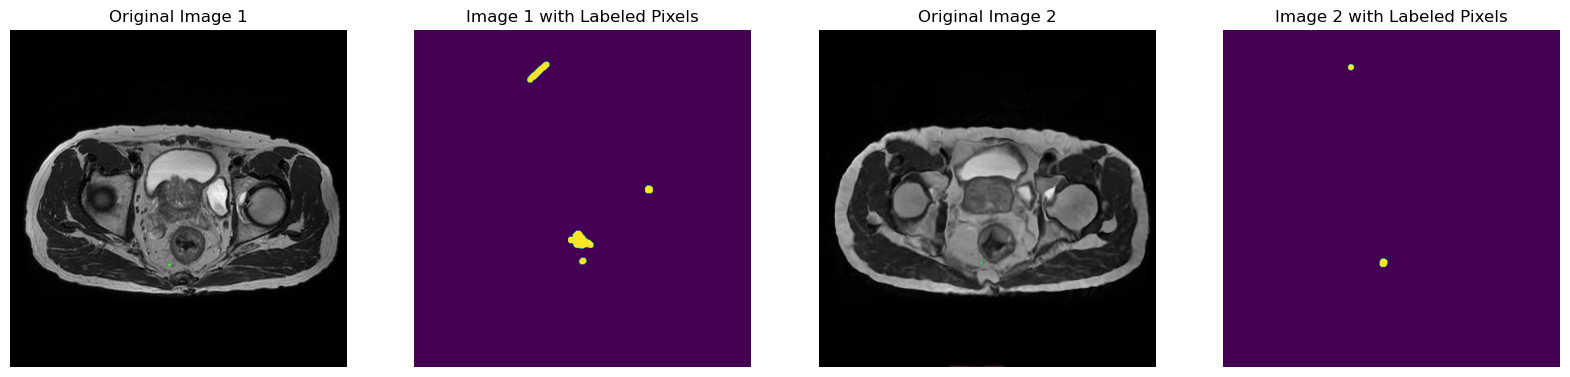

Centroid Distance: 66.60123642917885


In [57]:
import numpy as np
from scipy.ndimage import distance_transform_edt
from skimage import io, transform, color
import matplotlib.pyplot as plt
from skimage.draw import disk

def resize_image(image, target_size=(512, 512)):
    # Resize the image to the target size
    resized_image = transform.resize(image, target_size, anti_aliasing=True)
    return resized_image

def collect_green_pixels(image, threshold=0.91):
    # Collect coordinates of pixels with green value greater than the threshold
    green_pixels = np.argwhere(image[:, :, 1] > threshold)
    return green_pixels[:, ::-1]  # Reverse the order of columns (y, x)

def calculate_centroid(coordinates):
    # Calculate centroid of coordinates
    centroid = np.mean(coordinates, axis=0)
    return centroid

def visualize_images(image1, image2, labels1, labels2):
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))

    axes[0].imshow(image1)
    axes[0].set_title("Original Image 1")

    axes[1].imshow(labels1)
    axes[1].set_title("Image 1 with Labeled Pixels")

    axes[2].imshow(image2)
    axes[2].set_title("Original Image 2")

    axes[3].imshow(labels2)
    axes[3].set_title("Image 2 with Labeled Pixels")

    for ax in axes:
        ax.axis("off")

    plt.show()

def calculate_distance(image1, image2):
    # Resize both images to (512x512)
    target_size = (512, 512)
    resized_image1 = resize_image(image1, target_size)
    resized_image2 = resize_image(image2, target_size)

    # Collect green pixels coordinates
    green_pixels1 = collect_green_pixels(resized_image1)
    green_pixels2 = collect_green_pixels(resized_image2)

    # Check if the lists are empty
    if len(green_pixels1) == 0 or len(green_pixels2) == 0:
        print("No green pixels found in one or both images.")
        return None

    # Calculate centroids
    centroid1 = calculate_centroid(green_pixels1)
    centroid2 = calculate_centroid(green_pixels2)

    # Calculate distance between centroids
    centroid_distance = np.linalg.norm(centroid1 - centroid2)

    # Create binary masks for green pixels
    mask1 = np.zeros_like(resized_image1[:, :, 1], dtype=np.uint8)
    mask2 = np.zeros_like(resized_image2[:, :, 1], dtype=np.uint8)

    # Draw labeled pixels on the masks
    for coord in green_pixels1:
        rr, cc = disk(coord, radius=5, shape=mask1.shape)
        mask1[rr, cc] = 1

    for coord in green_pixels2:
        rr, cc = disk(coord, radius=5, shape=mask2.shape)
        mask2[rr, cc] = 1

    # Visualize the images
    visualize_images(resized_image1, resized_image2, mask1, mask2)

    return centroid_distance

# Load your images
image1 = io.imread('/home/souraja/DFMIR/Dataset/origMRIlabeled104/img1.1.jpg')
image2 = io.imread('/home/souraja/DFMIR/results/superresolutiononly1/good/img1.1.jpg')

# Convert images to float
image1 = image1.astype(np.float32) / 255.0
image2 = image2.astype(np.float32) / 255.0

# Calculate distance metrics and visualize images
centroid_distance = calculate_distance(image1, image2)

print(f"Centroid Distance: {centroid_distance}")


In [65]:
import numpy as np
from skimage import io, transform

def resize_image(image, target_size=(512, 512)):
    # Resize the image to the target size
    resized_image = transform.resize(image, target_size, anti_aliasing=True)
    return resized_image

def collect_green_pixels(image, threshold=0.91):
    # Collect coordinates of pixels with green value greater than the threshold
    green_pixels = np.argwhere(image[:, :, 1] > threshold)
    return green_pixels[:, ::-1]  # Reverse the order of columns (y, x)

# Load your images
image1 = io.imread('/home/souraja/DFMIR/Dataset/origMRIlabeled104/img1.1.jpg')
image2 = io.imread('/home/souraja/DFMIR/results/superresolutiononly1/good/img1.1.jpg')

# Resize both images to (512x512)
target_size = (512, 512)
resized_image1 = resize_image(image1, target_size)
resized_image2 = resize_image(image2, target_size)

# Collect green pixels coordinates
green_pixels1 = collect_green_pixels(resized_image1)
green_pixels2 = collect_green_pixels(resized_image2)

# Print coordinates of green pixels in both images
print("Coordinates of green pixels in Image 1:")
print(sorted(green_pixels1, key=lambda coord: coord[0]))

print("Coordinates of green pixels in Image 2:")
print(sorted(green_pixels2, key=lambda coord: coord[0]))


Coordinates of green pixels in Image 1:
[array([ 52, 201]), array([ 53, 199]), array([ 53, 200]), array([ 54, 198]), array([ 54, 199]), array([ 55, 197]), array([ 55, 198]), array([ 56, 196]), array([ 56, 197]), array([ 57, 195]), array([ 58, 193]), array([ 58, 194]), array([ 59, 192]), array([ 59, 193]), array([ 60, 191]), array([ 60, 192]), array([ 61, 190]), array([ 61, 191]), array([ 62, 189]), array([ 62, 190]), array([ 63, 188]), array([ 63, 189]), array([ 64, 187]), array([ 64, 188]), array([ 65, 186]), array([ 65, 187]), array([ 66, 185]), array([ 66, 186]), array([ 69, 181]), array([ 69, 182]), array([ 69, 183]), array([ 70, 180]), array([ 70, 181]), array([ 70, 182]), array([ 71, 179]), array([ 71, 180]), array([ 72, 178]), array([ 72, 179]), array([ 73, 178]), array([ 74, 177]), array([ 75, 176]), array([240, 356]), array([241, 355]), array([241, 356]), array([241, 357]), array([241, 358]), array([242, 355]), array([242, 356]), array([242, 357]), array([242, 358]), array([24

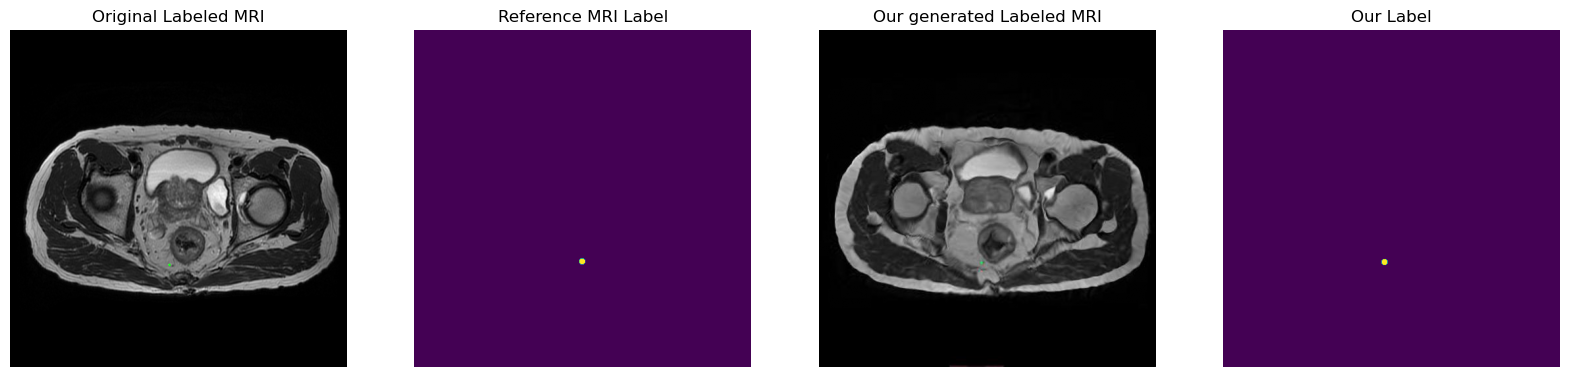

Centroid Distance: 10.04987562112089
Dice Similarity Coefficient (DSC): 0.0


In [95]:
import numpy as np
from scipy.ndimage import distance_transform_edt
from skimage import io, transform, color
import matplotlib.pyplot as plt
from skimage.draw import disk

def calculate_centroid(coordinates):
    # Calculate centroid of coordinates
    centroid = np.mean(coordinates, axis=0)
    return centroid

def visualize_images(image1, image2, labels1, labels2):
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))

    axes[0].imshow(image1)
    axes[0].set_title("Original Labeled MRI")

    axes[1].imshow(labels1)
    axes[1].set_title("Reference MRI Label")

    axes[2].imshow(image2)
    axes[2].set_title("Our generated Labeled MRI")

    axes[3].imshow(labels2)
    axes[3].set_title("Our Label")

    for ax in axes:
        ax.axis("off")

    plt.show()

def calculate_distance(image1, image2, coords1, coords2):
    # Resize both images to (512x512)
    target_size = (512, 512)
    resized_image1 = resize_image(image1, target_size)
    resized_image2 = resize_image(image2, target_size)

    # Create binary masks for green pixels using chosen coordinates
    mask1 = np.zeros_like(resized_image1[:, :, 1], dtype=np.uint8)
    mask2 = np.zeros_like(resized_image2[:, :, 1], dtype=np.uint8)

    # Draw labeled pixels on the masks
    for coord in coords1:
        rr, cc = disk(coord, radius=5, shape=mask1.shape)
        mask1[rr, cc] = 1

    for coord in coords2:
        rr, cc = disk(coord, radius=5, shape=mask2.shape)
        mask2[rr, cc] = 1

    # Visualize the images
    visualize_images(resized_image1, resized_image2, mask1, mask2)

    # Calculate centroids
    centroid1 = calculate_centroid(coords1)
    centroid2 = calculate_centroid(coords2)

    # Calculate distance between centroids
    centroid_distance = np.linalg.norm(centroid1 - centroid2)

    # Calculate the Dice Similarity Coefficient (DSC)
    intersection = np.logical_and(mask1, mask2)
    dsc = 2.0 * np.sum(intersection) / (np.sum(mask1) + np.sum(mask2))

    return centroid_distance, dsc

# Manually choose correct coordinates from the printed lists
coords1 = [
 
 (351, 255)
    
 ]
coords2 = [

 (352, 245)]

# Load your images
image1 = io.imread('/home/souraja/DFMIR/Dataset/origMRIlabeled104/img1.1.jpg')
image2 = io.imread('/home/souraja/DFMIR/results/superresolutiononly1/good/img1.1.jpg')

# Calculate distance metrics and visualize images
centroid_distance, dsc = calculate_distance(image1, image2, coords1, coords2)

print(f"Centroid Distance: {centroid_distance}")
print(f"Dice Similarity Coefficient (DSC): {dsc}")


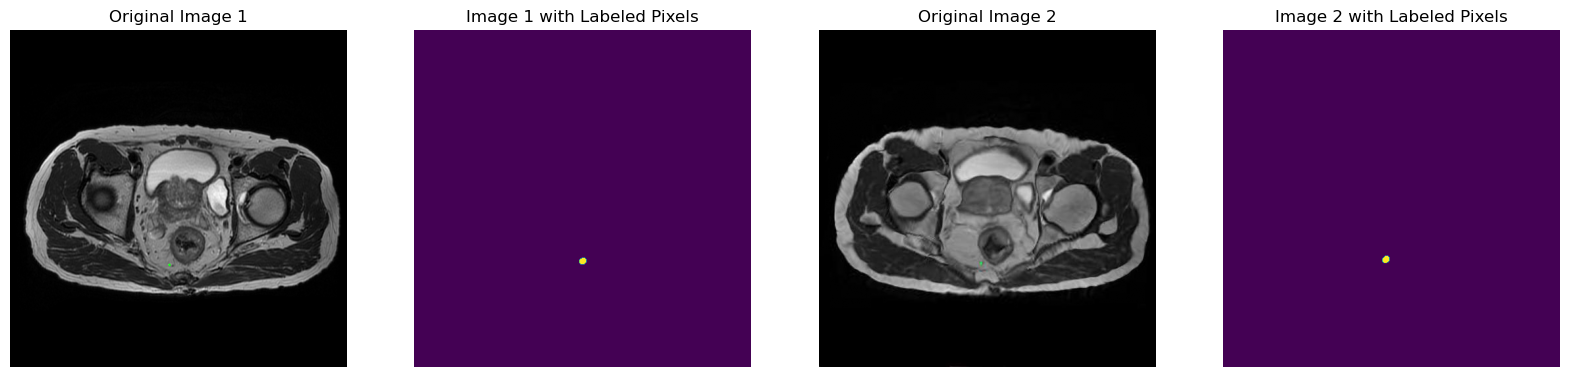

Centroid Distance: 9.147328085900888


In [94]:
import numpy as np
from scipy.ndimage import distance_transform_edt
from skimage import io, transform, color
import matplotlib.pyplot as plt
from skimage.draw import disk

def calculate_centroid(coordinates):
    # Calculate centroid of coordinates
    centroid = np.mean(coordinates, axis=0)
    return centroid

def visualize_images(image1, image2, labels1, labels2):
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))

    axes[0].imshow(image1)
    axes[0].set_title("Original Image 1")

    axes[1].imshow(labels1)
    axes[1].set_title("Image 1 with Labeled Pixels")

    axes[2].imshow(image2)
    axes[2].set_title("Original Image 2")

    axes[3].imshow(labels2)
    axes[3].set_title("Image 2 with Labeled Pixels")

    for ax in axes:
        ax.axis("off")

    plt.show()

def collect_roi_pixels(image, coords, margin=4):
    # Collect pixels in the region of interest (ROI) with a margin
    roi_pixels = set()

    for coord in coords:
        # Define the bounding box for the ROI with a margin
        y_min, x_min = max(0, coord[0] - margin), max(0, coord[1] - margin)
        y_max, x_max = min(image.shape[0], coord[0] + margin + 1), min(image.shape[1], coord[1] + margin + 1)

        # Collect pixels within the bounding box
        roi_pixels.update(zip(*np.where(image[y_min:y_max, x_min:x_max, 1] > 0.9)))

    return roi_pixels

def calculate_mdscm(image1, image2, coords1, coords2):
    # Resize both images to (512x512)
    target_size = (512, 512)
    resized_image1 = resize_image(image1, target_size)
    resized_image2 = resize_image(image2, target_size)

    # Collect pixels in the region of interest (ROI) with a margin
    roi_pixels1 = collect_roi_pixels(resized_image1, coords1)
    roi_pixels2 = collect_roi_pixels(resized_image2, coords2)

    # Calculate the Modified Dice Similarity Coefficient with Margin (MDSCM)
    intersection = len(roi_pixels1 & roi_pixels2)
    mdscm = 2.0 * intersection / (len(roi_pixels1) + len(roi_pixels2))

    return mdscm

def calculate_distance(image1, image2, coords1, coords2):
    # Resize both images to (512x512)
    target_size = (512, 512)
    resized_image1 = resize_image(image1, target_size)
    resized_image2 = resize_image(image2, target_size)

    # Create binary masks for green pixels using chosen coordinates
    mask1 = np.zeros_like(resized_image1[:, :, 1], dtype=np.uint8)
    mask2 = np.zeros_like(resized_image2[:, :, 1], dtype=np.uint8)

    # Draw labeled pixels on the masks
    for coord in coords1:
        rr, cc = disk(coord, radius=5, shape=mask1.shape)
        mask1[rr, cc] = 1

    for coord in coords2:
        rr, cc = disk(coord, radius=5, shape=mask2.shape)
        mask2[rr, cc] = 1

    # Visualize the images
    visualize_images(resized_image1, resized_image2, mask1, mask2)

    # Calculate centroids
    centroid1 = calculate_centroid(coords1)
    centroid2 = calculate_centroid(coords2)

    # Calculate distance between centroids
    centroid_distance = np.linalg.norm(centroid1 - centroid2)

    # Calculate the Modified Dice Similarity Coefficient with Margin (MDSCM)
    #mdscm = calculate_mdscm(resized_image1, resized_image2, coords1, coords2)

    return centroid_distance

# Manually choose correct coordinates from the printed lists
coords1 = [
    (351, 255),
    (351, 256),
    (350, 257)
]
coords2 = [
    (349, 246),
    (348, 247),
    (347, 248),
    (348, 248)
]

# Load your images
image1 = io.imread('/home/souraja/DFMIR/Dataset/origMRIlabeled104/img1.1.jpg')
image2 = io.imread('/home/souraja/DFMIR/results/original/regMRIwith original MRI labeled/img1.1.jpg')

# Calculate distance metrics and visualize images
centroid_distance = calculate_distance(image1, image2, coords1, coords2)

print(f"Centroid Distance: {centroid_distance}")
#print(f"Modified Dice Similarity Coefficient with Margin (MDSCM): {mdscm}")


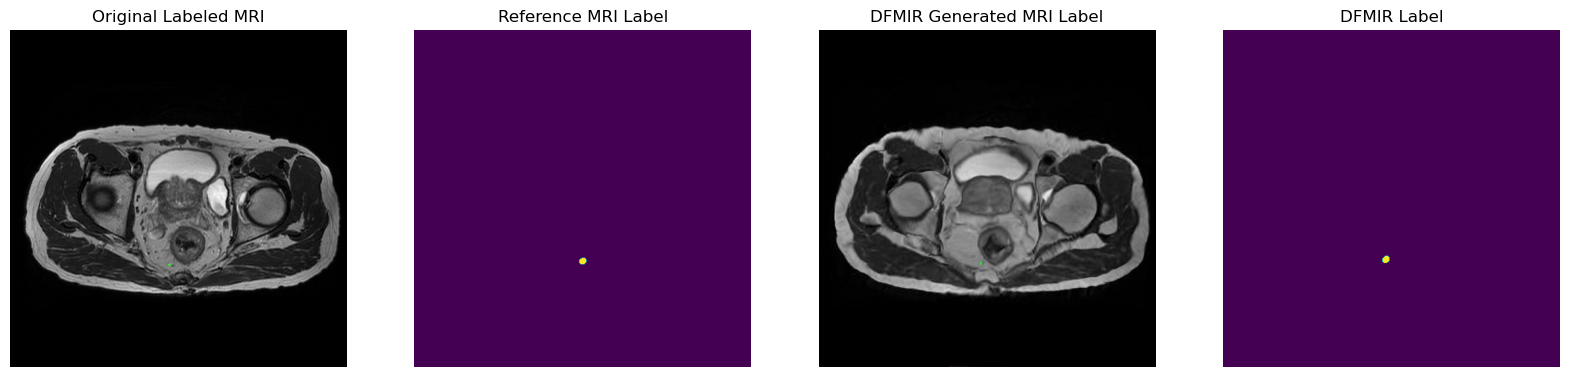

Centroid Distance: 9.147328085900888
Ratio of Pixels in Range: 0.0


In [77]:
import numpy as np
from skimage import io, transform
import matplotlib.pyplot as plt
from skimage.draw import disk

def calculate_centroid(coordinates):
    # Calculate centroid of coordinates
    centroid = np.mean(coordinates, axis=0)
    return centroid

def visualize_images(image1, image2, labels1, labels2):
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))

    axes[0].imshow(image1)
    axes[0].set_title("Original Labeled MRI")

    axes[1].imshow(labels1)
    axes[1].set_title("Reference MRI Label")

    axes[2].imshow(image2)
    axes[2].set_title("DFMIR Generated MRI Label")

    axes[3].imshow(labels2)
    axes[3].set_title("DFMIR Label")

    for ax in axes:
        ax.axis("off")

    plt.show()

def calculate_ratio(image, coords, margin=3):
    # Collect pixels in the region of interest (ROI) with a margin
    roi_pixels = set()

    for coord in coords:
        # Define the bounding box for the ROI with a margin
        y_min, x_min = max(0, coord[0] - margin), max(0, coord[1] - margin)
        y_max, x_max = min(image.shape[0], coord[0] + margin + 1), min(image.shape[1], coord[1] + margin + 1)

        # Collect pixels within the bounding box
        roi_pixels.update(zip(*np.where(image[y_min:y_max, x_min:x_max, 1] > 0.9)))

    # Calculate the ratio
    total_green_pixels = np.sum(image[:, :, 1] > 0.9)
    ratio = len(roi_pixels) / total_green_pixels if total_green_pixels > 0 else 0.0

    return ratio

def calculate_distance(image1, image2, coords1, coords2):
    # Resize both images to (512x512)
    target_size = (512, 512)
    resized_image1 = resize_image(image1, target_size)
    resized_image2 = resize_image(image2, target_size)

    # Create binary masks for green pixels using chosen coordinates
    mask1 = np.zeros_like(resized_image1[:, :, 1], dtype=np.uint8)
    mask2 = np.zeros_like(resized_image2[:, :, 1], dtype=np.uint8)

    # Draw labeled pixels on the masks
    for coord in coords1:
        rr, cc = disk(coord, radius=5, shape=mask1.shape)
        mask1[rr, cc] = 1

    for coord in coords2:
        rr, cc = disk(coord, radius=5, shape=mask2.shape)
        mask2[rr, cc] = 1

    # Visualize the images
    visualize_images(resized_image1, resized_image2, mask1, mask2)

    # Calculate centroids
    centroid1 = calculate_centroid(coords1)
    centroid2 = calculate_centroid(coords2)

    # Calculate distance between centroids
    centroid_distance = np.linalg.norm(centroid1 - centroid2)

    # Calculate the ratio
    ratio = calculate_ratio(resized_image2, coords2, margin=3)

    return centroid_distance, ratio

# Manually choose correct coordinates from the printed lists
coords1 = [
    (351, 255),
    (351, 256),
    (350, 257)
]
coords2 = [
    (349, 246),
    (348, 247),
    (347, 248),
    (348, 248)
]

# Load your images
image1 = io.imread('/home/souraja/DFMIR/Dataset/origMRIlabeled104/img1.1.jpg')
image2 = io.imread('/home/souraja/DFMIR/results/original/regMRIwith original MRI labeled/img1.1.jpg')

# Calculate distance metrics and visualize images
centroid_distance, ratio = calculate_distance(image1, image2, coords1, coords2)

print(f"Centroid Distance: {centroid_distance}")
print(f"Ratio of Pixels in Range: {ratio}")


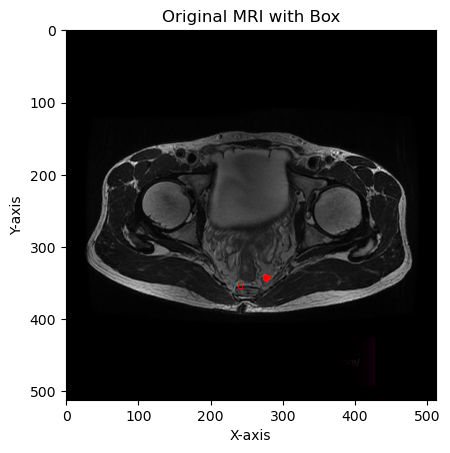

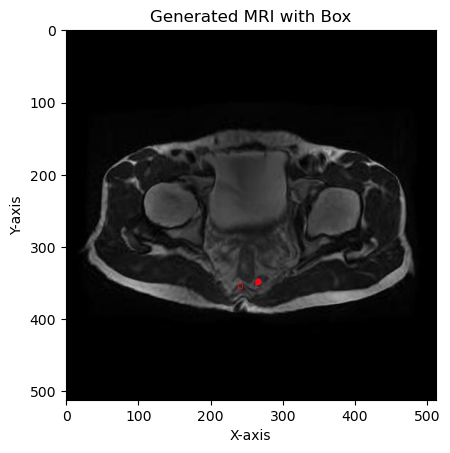

In [149]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

def draw_box(image_path, box_coordinates, title):
    # Open the image using PIL
    image = Image.open(image_path)

    # Create figure and axis
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(image, cmap='gray')

    # Extract box coordinates
    x, y, width, height = box_coordinates

    # Create a rectangle patch
    rect = patches.Rectangle((x, y), width, height, linewidth=0.5, edgecolor='red', facecolor='none')

    # Add the rectangle to the axis
    ax.add_patch(rect)

    # Set axis labels and title
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title(title)

    # Show the plot
    plt.show()

# File addresses of the original and generated images
original_image_path = '/home/souraja/DFMIR/Dataset/origMRIlabeled104/img23.200001.jpg'
generated_image_path = '/home/souraja/DFMIR/results/superresolutiononly1/good/img23.2.jpg'

# Coordinates of the box (x, y, width, height)
box_coordinates = (238, 350, 5, 7)  # Example coordinates, replace with your actual values

# Draw the box on the original image
draw_box(original_image_path, box_coordinates, title='Original MRI with Box')

# Draw the box on the generated image
draw_box(generated_image_path, box_coordinates, title='Generated MRI with Box')


In [69]:
from PIL import Image
import os

def resize_images_inplace(folder1, folder2):
    for filename in os.listdir(folder1):
        if filename.endswith(('.jpg', '.jpeg', '.png')):

            # Get image paths
            img_path1 = os.path.join(folder1, filename)
            img_path2 = os.path.join(folder2, filename)

            # Open images
            img1 = Image.open(img_path1)
            img2 = Image.open(img_path2)

            # Get sizes
            size1 = img1.size[0] * img1.size[1]
            size2 = img2.size[0] * img2.size[1]

            # Resize the larger image to match the size of the smaller one
            if size1 > size2:
                img2 = img2.resize((img1.size[0], img1.size[1]), Image.ANTIALIAS)
                img2.save(img_path2)
            else:
                img1 = img1.resize((img2.size[0], img2.size[1]), Image.ANTIALIAS)
                img1.save(img_path1)

if __name__ == "__main__":
    folder1 = "/home/souraja/UNet-Pytorch-Customdataset/data/imgs"
    folder2 = "/home/souraja/UNet-Pytorch-Customdataset/data/masks"

    resize_images_inplace(folder1, folder2)


/tmp/ipykernel_201475/1556670086.py:25: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img1 = img1.resize((img2.size[0], img2.size[1]), Image.ANTIALIAS)


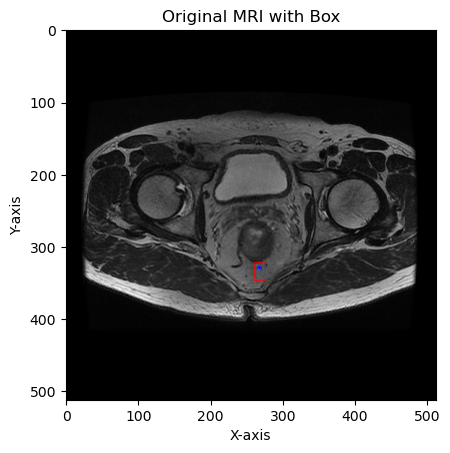

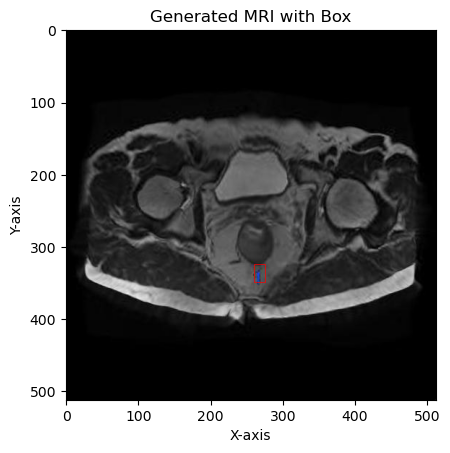

DSC Percentage for ROI: 78.57%


In [225]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

def draw_box(image_path, box_coordinates, title):
    # Open the image using PIL
    image = Image.open(image_path)

    # Create figure and axis
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(image, cmap='gray')

    # Extract box coordinates
    x, y, width, height = box_coordinates

    # Create a rectangle patch
    rect = patches.Rectangle((x, y), width, height, linewidth=0.5, edgecolor='red', facecolor='none')

    # Add the rectangle to the axis
    ax.add_patch(rect)

    # Set axis labels and title
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title(title)

    # Show the plot
    plt.show()

def calculate_dsc(box1, box2):
    # Calculate Dice Similarity Coefficient for the two boxes
    intersection_x = max(0, min(box1[0] + box1[2], box2[0] + box2[2]) - max(box1[0], box2[0]))
    intersection_y = max(0, min(box1[1] + box1[3], box2[1] + box2[3]) - max(box1[1], box2[1]))
    intersection_area = intersection_x * intersection_y

    union_area = (box1[2] * box1[3]) + (box2[2] * box2[3]) - intersection_area

    dsc = (intersection_area) / union_area if union_area != 0 else 0.0
    return dsc * 100  # Multiply by 100 to get percentage

# File addresses of the original and generated images
original_image_path = '/home/souraja/DFMIR/Dataset/origMRIlabeled104/img33.1.jpg'
generated_image_path = '/home/souraja/DFMIR/results/superresolutiononly1/good/img33.1.jpg'

# Coordinates of the box for the original image (x, y, width, height)
box_coordinates_original = (260, 321, 15, 25)  # Example coordinates, replace with your actual values

# Coordinates of the box for the generated image (x, y, width, height)
box_coordinates_generated = (260, 324, 15, 25)  # Example coordinates, replace with your actual values

# Draw the box on the original image
draw_box(original_image_path, box_coordinates_original, title='Original MRI with Box')

# Draw the box on the generated image
draw_box(generated_image_path, box_coordinates_generated, title='Generated MRI with Box')

# Calculate DSC for the two boxes
dsc_percentage = calculate_dsc(box_coordinates_original, box_coordinates_generated)
print(f'DSC Percentage for ROI: {dsc_percentage:.2f}%')


In [203]:
from PIL import Image
import os

def convert_rgb_to_l(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate through all files in the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith(".jpg"):
            # Construct the full paths
            input_path = os.path.join(input_folder, filename)
            output_path = os.path.join(output_folder, filename)

            # Open the image and convert to grayscale
            img = Image.open(input_path).convert("L")

            # Save the converted image
            img.save(output_path)

if __name__ == "__main__":
    # Replace these paths with your actual input and output folders
    input_folder_path = "/home/souraja/UNet-Pytorch-Customdataset/data/masks"
    output_folder_path = "/home/souraja/UNet-Pytorch-Customdataset/data/masks1"

    # Call the function to convert RGB to L
    convert_rgb_to_l(input_folder_path, output_folder_path)


In [75]:
from PIL import Image
import os

def resize_images(input_folder, output_folder, target_size):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate through all files in the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith(".jpg"):
            # Construct the full paths
            input_path = os.path.join(input_folder, filename)
            output_path = os.path.join(output_folder, filename)

            # Open the image
            img = Image.open(input_path)
            

            
            # Resize the image to the target size (assumes square size)
            img_resized = img.resize((1000, 1000))

            # Save the resized image
            img_resized.save(output_path)

if __name__ == "__main__":
    # Replace these paths and size with your actual input, output, and target size
    input_folder_path = "/home/souraja/UNet-Pytorch-Customdataset/data/imgs"
    output_folder_path = "/home/souraja/UNet-Pytorch-Customdataset/data/imgs2"
    target_image_size = 256  # Change this to your desired size

    # Call the function to resize images
    resize_images(input_folder_path, output_folder_path, target_image_size)


In [254]:
def average_time_taken(file_path, target_phrase, num_epochs):
    time_taken_list = []
    epoch_count = 0

    with open(file_path, 'r') as file:
        for line in file:
            if target_phrase in line:
                # Extract the time taken value from the line
                time_taken = float(line.split("Time Taken: ")[1].split(" sec")[0])
                time_taken_list.append(time_taken)

                # Increment the epoch count
                epoch_count += 1

                # Check if the desired number of epochs is reached
                if epoch_count >= num_epochs:
                    break

    # Calculate the average time taken
    average_time = sum(time_taken_list) / len(time_taken_list) if time_taken_list else None

    return average_time

# File path of the .txt file
file_path = '/home/souraja/Downloads/rough document'

# Target phrase to identify lines containing the time taken information
target_phrase = 'Time Taken'

# Number of epochs to average over
num_epochs = 599

# Calculate the average time taken
average_time = average_time_taken(file_path, target_phrase, num_epochs)

if average_time is not None:
    print(f'Average Time Taken over {num_epochs} epochs: {average_time:.2f} seconds')
else:
    print('No time information found in the file.')


Average Time Taken over 599 epochs: 25.29 seconds


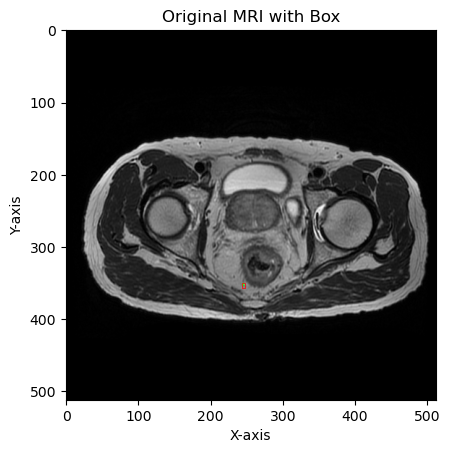

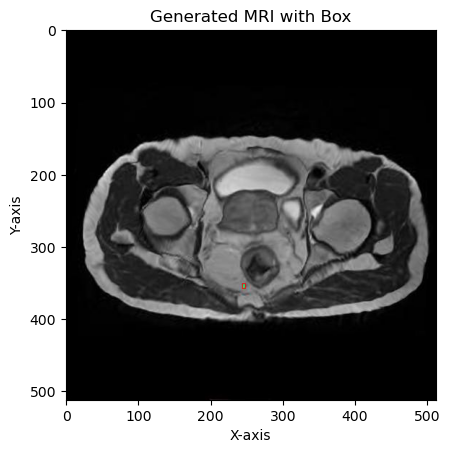

In [24]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

def draw_box(image_path, box_coordinates, title):
    # Open the image using PIL
    image = Image.open(image_path)

    # Create figure and axis
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(image, cmap='gray')

    # Extract box coordinates
    x, y, width, height = box_coordinates

    # Create a rectangle patch
    rect = patches.Rectangle((x, y), width, height, linewidth=0.5, edgecolor='red', facecolor='none')

    # Add the rectangle to the axis
    ax.add_patch(rect)

    # Set axis labels and title
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title(title)

    # Show the plot
    plt.show()

# File addresses of the original and generated images
original_image_path = '/home/souraja/Downloads/img1.1.jpg'
generated_image_path = '/home/souraja/DFMIR/results/original/regMRIwith original MRI labeled/img1.1.jpg'

# Coordinates of the box (x, y, width, height)
box_coordinates = (243, 350, 5, 7)  # Example coordinates, replace with your actual values

# Draw the box on the original image
draw_box(original_image_path, box_coordinates, title='Original MRI with Box')

# Draw the box on the generated image
draw_box(generated_image_path, box_coordinates, title='Generated MRI with Box')


(256, 256)


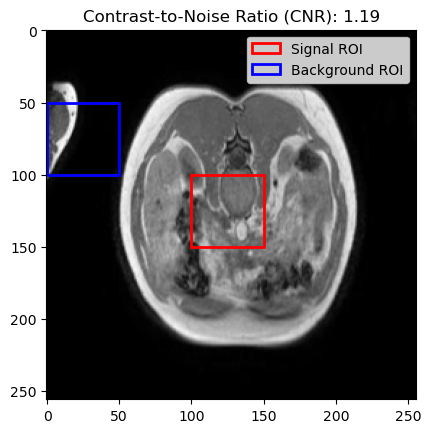

Contrast-to-Noise Ratio (CNR): 1.19


In [12]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def calculate_cnr(image_path, signal_roi, background_roi):
    # Load the image
    image = Image.open(image_path)
    image = image.resize((256, 256))
    
    # Convert the image to grayscale
    grayscale_image = image.convert("L")
    image_array = np.array(grayscale_image)
    print(image_array.shape)
    
    # Extract signal and background regions of interest (ROI)
    signal_region = image_array[signal_roi[0]:signal_roi[1], signal_roi[2]:signal_roi[3]]
    background_region = image_array[background_roi[0]:background_roi[1], background_roi[2]:background_roi[3]]
    
    # Calculate mean intensities
    mean_signal = np.mean(signal_region)
    mean_background = np.mean(background_region)
    
    # Calculate the standard deviation of the background (noise)
    std_background = np.std(background_region)
    
    # Calculate CNR
    cnr = abs(mean_signal - mean_background) / std_background
    
    # Plot the image with ROI boxes
    fig, ax = plt.subplots(1)
    ax.imshow(grayscale_image, cmap='gray')
    
    # Add a rectangle patch for the signal ROI
    signal_rect = patches.Rectangle((signal_roi[2], signal_roi[0]), signal_roi[3] - signal_roi[2], signal_roi[1] - signal_roi[0], 
                                    linewidth=2, edgecolor='r', facecolor='none', label='Signal ROI')
    ax.add_patch(signal_rect)
    
    # Add a rectangle patch for the background ROI
    background_rect = patches.Rectangle((background_roi[2], background_roi[0]), background_roi[3] - background_roi[2], background_roi[1] - background_roi[0], 
                                        linewidth=2, edgecolor='b', facecolor='none', label='Background ROI')
    ax.add_patch(background_rect)
    
    # Add a legend
    plt.legend(handles=[signal_rect, background_rect], loc="upper right")
    
    # Display the image
    plt.title(f"Contrast-to-Noise Ratio (CNR): {cnr:.2f}")
    plt.show()

    return cnr

# Example usage:
# Define ROIs: [start_row, end_row, start_column, end_column]
signal_roi = [100, 150, 100, 150]     # Example coordinates for signal ROI
background_roi = [50, 100, 0, 50]  # Example coordinates for background ROI

image_path = '/home/souraja/DFMIR/Dataset/testAdataset2_resized/image2.0141.jpg'
cnr_value = calculate_cnr(image_path, signal_roi, background_roi)
print(f"Contrast-to-Noise Ratio (CNR): {cnr_value:.2f}")


/tmp/ipykernel_17296/1448647275.py:27: RuntimeWarning: invalid value encountered in double_scalars
  cnr = abs(mean_signal - mean_background) / std_background


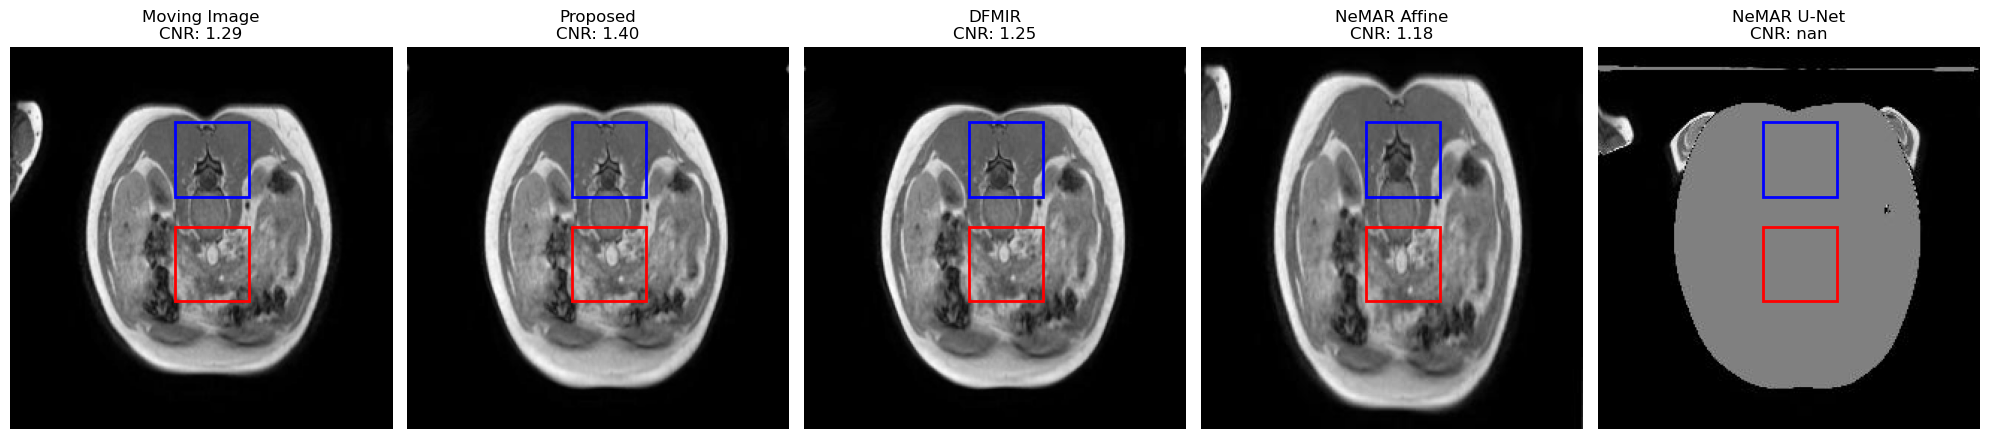

In [18]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def calculate_cnr(image_path, signal_roi, background_roi):
    # Load the image
    image = Image.open(image_path)
    image = image.resize((256, 256))
    
    # Convert the image to grayscale
    grayscale_image = image.convert("L")
    image_array = np.array(grayscale_image)
    
    # Extract signal and background regions of interest (ROI)
    signal_region = image_array[signal_roi[0]:signal_roi[1], signal_roi[2]:signal_roi[3]]
    background_region = image_array[background_roi[0]:background_roi[1], background_roi[2]:background_roi[3]]
    
    # Calculate mean intensities
    mean_signal = np.mean(signal_region)
    mean_background = np.mean(background_region)
    
    # Calculate the standard deviation of the background (noise)
    std_background = np.std(background_region)
    
    # Calculate CNR
    cnr = abs(mean_signal - mean_background) / std_background
    
    return grayscale_image, cnr

def plot_images_with_cnr(image_paths, signal_roi, background_roi, headings):
    # Create a figure to plot images in a row
    fig, axes = plt.subplots(1, len(image_paths), figsize=(20, 5))

    for i, image_path in enumerate(image_paths):
        # Calculate CNR and get the grayscale image
        grayscale_image, cnr = calculate_cnr(image_path, signal_roi, background_roi)

        # Plot the image
        ax = axes[i]
        ax.imshow(grayscale_image, cmap='gray')
        
        # Add a rectangle patch for the signal ROI
        signal_rect = patches.Rectangle((signal_roi[2], signal_roi[0]), signal_roi[3] - signal_roi[2], signal_roi[1] - signal_roi[0], 
                                        linewidth=2, edgecolor='r', facecolor='none', label='Signal ROI')
        ax.add_patch(signal_rect)
        
        # Add a rectangle patch for the background ROI
        background_rect = patches.Rectangle((background_roi[2], background_roi[0]), background_roi[3] - background_roi[2], background_roi[1] - background_roi[0], 
                                            linewidth=2, edgecolor='b', facecolor='none', label='Background ROI')
        ax.add_patch(background_rect)
        
        # Set the title with custom heading and CNR value
        ax.set_title(f"{headings[i]}\nCNR: {cnr:.2f}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage:
image_paths = [
    '/home/souraja/DFMIR/Dataset/testAdataset2_resized/image2.0141.jpg',
    '/home/souraja/DFMIR/results/finalmodel2/image2.0141.jpg',
    '/home/souraja/DFMIR/results/original2/image2.0141.jpg',
    '/home/souraja/nemar/results/affine2multi/image2.0141.jpg',
    '/home/souraja/nemar/results/unet2/image2.0141.jpg'
]

# Define custom headings for each image
headings = [
    "Moving Image",
    "Proposed",
    "DFMIR",
    "NeMAR Affine",
    "NeMAR U-Net"
]

# Define common ROIs: [start_row, end_row, start_column, end_column]
signal_roi = [120, 170, 110, 160]     # Example coordinates for signal ROI
background_roi = [50, 100, 110, 160]  # Example coordinates for background ROI

plot_images_with_cnr(image_paths, signal_roi, background_roi, headings)
